# Programming Language Popularity: A Feature-Based Analysis
This project analyzes programming language popularity by examining developer preferences and related features. Through data cleaning, EDA, recommendation, and clustering models, it uncovers patterns in language choice without focusing on time-based trends. Visualizations like word clouds and cluster diagrams make it easy to understand relationships, helping to reveal why certain languages stand out among developers.


Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from wordcloud import WordCloud

In [3]:
df = pd.read_csv('C:/Users/Jhotika Raja/Downloads/dpel/data_cleaned.csv')
df.head()

ResponseId                      MainBranch  \
0           1                   None of these   
1           2  I am a developer by profession   
2           3  I am a developer by profession   
3           4  I am a developer by profession   
4           5  I am a developer by profession   

                                    CodingActivities  \
0                                                NaN   
1  Hobby;Contribute to open-source projects;Boots...   
2  Hobby;Professional development or self-paced l...   
3                                              Hobby   
4  Hobby;Contribute to open-source projects;Profe...   

                                        EdLevel  \
0                                           NaN   
1  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                           LearnCode YearsCode  \
0                                                NaN       NaN   
1  Books / Physical media;Colleague;Friend or fam...        18   
2  Books / Physical media;Colleague;On the job tr...        27   
3  Colleague;Friend or family member;Other online...        12   
4  Books / Physical media;Online Courses or Certi...         6   

                                DevType                   Country  \
0                                   NaN                       NaN   
1  Senior Executive (C-Suite, VP, etc.)  United States of America   
2                   Developer, back-end  United States of America   
3                  Developer, front-end  United States of America   
4                 Developer, full-stack               Philippines   

                              LanguageHaveWorkedWith  \
0                                                NaN   
1                         HTML/CSS;JavaScript;Python   
2                         Bash/Shell (all shells);Go   
3  Bash/Shell (all shells);HTML/CSS;JavaScript;PH...   
4                     HTML/CSS;JavaScript;TypeScript   

                              LanguageWantToWorkWith  ...  \
0                                                NaN  ...   
1  Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...  ...   
2                                 Haskell;OCaml;Rust  ...   
3  Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...  ...   
4         HTML/CSS;JavaScript;Python;Rust;TypeScript  ...   

                              PlatformHaveWorkedWith  \
0                                                NaN   
1           Amazon Web Services (AWS);Netlify;Vercel   
2  Amazon Web Services (AWS);Google Cloud;OpenSta...   
3                                  Cloudflare;Heroku   
4  Amazon Web Services (AWS);Firebase;Heroku;Netl...   

                         WebframeHaveWorkedWith  \
0                                           NaN   
1                    Next.js;React;Remix;Vue.js   
2                                           NaN   
3  Node.js;React;Ruby on Rails;Vue.js;WordPress   
4   Express;Gatsby;NestJS;Next.js;Node.js;React   

                              WebframeWantToWorkWith  \
0                                                NaN   
1               Deno;Elm;Nuxt.js;React;Svelte;Vue.js   
2                                                NaN   
3                       Node.js;Ruby on Rails;Vue.js   
4  Express;NestJS;Next.js;Node.js;React;Remix;Vue.js   

        MiscTechHaveWorkedWith                      ToolsTechHaveWorkedWith  \
0                          NaN                                          NaN   
1  Electron;React Native;Tauri  Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn   
2                          NaN             Cargo;Docker;Kubernetes;Make;Nix   
3                          NaN               Homebrew;npm;Vite;Webpack;Yarn   
4                          NaN                      Docker;npm;Webpack;Yarn   

                             ToolsTechWantToWorkWith  \
0                                   

In [4]:
df.isnull().sum()

ResponseId                          0
MainBranch                          0
CodingActivities                15420
EdLevel                          1211
LearnCode                        1521
YearsCode                        1749
DevType                         12312
Country                          1211
LanguageHaveWorkedWith           2044
LanguageWantToWorkWith           8475
DatabaseHaveWorkedWith          15749
DatabaseWantToWorkWith          28273
PlatformHaveWorkedWith          25556
WebframeHaveWorkedWith          22246
WebframeWantToWorkWith          32443
MiscTechHaveWorkedWith          32165
ToolsTechHaveWorkedWith         11300
ToolsTechWantToWorkWith         20869
NEWCollabToolsHaveWorkedWith     3320
NEWCollabToolsWantToWorkWith    12535
OpSysProfessional use           10597
AISearchHaveWorkedWith          32856
dtype: int64

# **Handling Missing values**

# *   Core Categorical column

# *   optional categorical

# *   Futuristic column

# *   numerical column








# Purpose: Missing values are common and can impact analysis and model accuracy. Here, we handle missing data to ensure our EDA and modeling are based on complete, reliable inputs. Each column’s missing values are treated based on its data type and importance in our analysis.

In [5]:
core_categorical_columns = ['Country', 'EdLevel', 'MainBranch', 'NEWCollabToolsHaveWorkedWith']
for col in core_categorical_columns:
  mode=df[col].mode()[0]
  df[col]=df[col].fillna(mode)
optional_categorical_columns = ['CodingActivities', 'DevType', 'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith',
                                'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith', 'MiscTechHaveWorkedWith',
                                'ToolsTechHaveWorkedWith', 'AISearchHaveWorkedWith','NEWCollabToolsWantToWorkWith',
'OpSysProfessional use']
for col in optional_categorical_columns:
  df[col]=df[col].fillna('Not Specified')
future_preference_columns = ['LanguageWantToWorkWith', 'DatabaseWantToWorkWith', 'WebframeWantToWorkWith',
                             'ToolsTechWantToWorkWith', 'NEWCollabToolsWantToWorkWith']
for col in future_preference_columns:
    df[col].fillna('No Preference',inplace=True)
df['YearsCode']=pd.to_numeric(df['YearsCode'],errors='coerce')
experience=df['YearsCode'].median()
df['YearsCode']=df['YearsCode'].fillna(experience)


C:\Users\Jhotika Raja\AppData\Local\Temp\ipykernel_99832\868012951.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('No Preference',inplace=True)


In [6]:
df.isnull().sum()

ResponseId                         0
MainBranch                         0
CodingActivities                   0
EdLevel                            0
LearnCode                       1521
YearsCode                          0
DevType                            0
Country                            0
LanguageHaveWorkedWith             0
LanguageWantToWorkWith             0
DatabaseHaveWorkedWith             0
DatabaseWantToWorkWith             0
PlatformHaveWorkedWith             0
WebframeHaveWorkedWith             0
WebframeWantToWorkWith             0
MiscTechHaveWorkedWith             0
ToolsTechHaveWorkedWith            0
ToolsTechWantToWorkWith            0
NEWCollabToolsHaveWorkedWith       0
NEWCollabToolsWantToWorkWith       0
OpSysProfessional use              0
AISearchHaveWorkedWith             0
dtype: int64

In [7]:
df.head()

ResponseId                      MainBranch  \
0           1                   None of these   
1           2  I am a developer by profession   
2           3  I am a developer by profession   
3           4  I am a developer by profession   
4           5  I am a developer by profession   

                                    CodingActivities  \
0                                      Not Specified   
1  Hobby;Contribute to open-source projects;Boots...   
2  Hobby;Professional development or self-paced l...   
3                                              Hobby   
4  Hobby;Contribute to open-source projects;Profe...   

                                        EdLevel  \
0  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
1  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                           LearnCode  YearsCode  \
0                                                NaN       11.0   
1  Books / Physical media;Colleague;Friend or fam...       18.0   
2  Books / Physical media;Colleague;On the job tr...       27.0   
3  Colleague;Friend or family member;Other online...       12.0   
4  Books / Physical media;Online Courses or Certi...        6.0   

                                DevType                   Country  \
0                         Not Specified  United States of America   
1  Senior Executive (C-Suite, VP, etc.)  United States of America   
2                   Developer, back-end  United States of America   
3                  Developer, front-end  United States of America   
4                 Developer, full-stack               Philippines   

                              LanguageHaveWorkedWith  \
0                                      Not Specified   
1                         HTML/CSS;JavaScript;Python   
2                         Bash/Shell (all shells);Go   
3  Bash/Shell (all shells);HTML/CSS;JavaScript;PH...   
4                     HTML/CSS;JavaScript;TypeScript   

                              LanguageWantToWorkWith  ...  \
0                                      No Preference  ...   
1  Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...  ...   
2                                 Haskell;OCaml;Rust  ...   
3  Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...  ...   
4         HTML/CSS;JavaScript;Python;Rust;TypeScript  ...   

                              PlatformHaveWorkedWith  \
0                                      Not Specified   
1           Amazon Web Services (AWS);Netlify;Vercel   
2  Amazon Web Services (AWS);Google Cloud;OpenSta...   
3                                  Cloudflare;Heroku   
4  Amazon Web Services (AWS);Firebase;Heroku;Netl...   

                         WebframeHaveWorkedWith  \
0                                 Not Specified   
1                    Next.js;React;Remix;Vue.js   
2                                 Not Specified   
3  Node.js;React;Ruby on Rails;Vue.js;WordPress   
4   Express;Gatsby;NestJS;Next.js;Node.js;React   

                              WebframeWantToWorkWith  \
0                                      No Preference   
1               Deno;Elm;Nuxt.js;React;Svelte;Vue.js   
2                                      No Preference   
3                       Node.js;Ruby on Rails;Vue.js   
4  Express;NestJS;Next.js;Node.js;React;Remix;Vue.js   

        MiscTechHaveWorkedWith                      ToolsTechHaveWorkedWith  \
0                Not Specified                                Not Specified   
1  Electron;React Native;Tauri  Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn   
2                Not Specified             Cargo;Docker;Kubernetes;Make;Nix   
3                Not Specified               Homebrew;npm;Vite;Webpack;Yarn   
4                Not Specified                      Docker;npm;Webpack;Yarn   

                             ToolsTechWantToWorkWith  \
0                             

# **Lets Explore the dataset!!**

In [8]:
df['YearsCode'].value_counts()

YearsCode
10.0    6521
11.0    5589
5.0     5415
6.0     4893
8.0     4879
7.0     4800
4.0     4466
15.0    4336
3.0     4269
20.0    4021
12.0    3471
9.0     3130
2.0     2826
25.0    2685
13.0    2601
14.0    2278
30.0    2078
16.0    1842
18.0    1690
17.0    1544
23.0    1327
40.0    1302
1.0     1294
22.0    1210
35.0    1118
24.0     959
19.0     826
21.0     761
28.0     715
27.0     710
26.0     706
33.0     496
32.0     444
38.0     428
45.0     360
42.0     347
34.0     333
29.0     324
37.0     312
36.0     282
31.0     272
43.0     265
39.0     229
41.0     227
44.0     160
50.0     125
46.0     101
48.0      96
47.0      79
49.0      42
Name: count, dtype: int64

In [9]:
learncode_split = df['LearnCode'].str.split(';', expand=True)

# Step 2: Select the first column after splitting
learncode0 = learncode_split[0]
learncode0_counts = learncode0.value_counts()

print("Value counts in learncode0:\n", learncode0_counts)

Value counts in learncode0:
 0
Books / Physical media                                 45406
Online Courses or Certification                        12809
Other online resources (e.g., videos, blogs, forum)     9064
Colleague                                               7466
On the job training                                     5634
Friend or family member                                 2463
School (i.e., University, College, etc)                 2345
Hackathons (virtual or in-person)                       1581
Other (please specify):                                  671
Coding Bootcamp                                          224
Name: count, dtype: int64


In [10]:
def count_total_language_have_worked_with(df):
    # Split each entry by ';' and stack all languages into a single column
    language_have_total = df['LanguageHaveWorkedWith'].str.split(';', expand=True).stack()
    # Count the occurrences of each language
    language_have_counts = language_have_total.value_counts()
    print("Total counts in LanguageHaveWorkedWith:")
    print(language_have_counts)

print("Total Language Counts for 'LanguageHaveWorkedWith' Column:")
count_total_language_have_worked_with(df)

Total Language Counts for 'LanguageHaveWorkedWith' Column:
Total counts in LanguageHaveWorkedWith:
JavaScript                 55711
HTML/CSS                   46396
Python                     43158
SQL                        42623
TypeScript                 34041
Bash/Shell (all shells)    28351
Java                       26757
C#                         24193
C++                        19634
C                          16940
PHP                        16274
PowerShell                 11902
Go                         11592
Rust                       11427
Kotlin                      7935
Ruby                        5454
Lua                         5336
Dart                        5273
Assembly                    4753
Swift                       4072
R                           3702
Visual Basic (.Net)         3568
MATLAB                      3339
VBA                         3107
Groovy                      2976
Delphi                      2831
Scala                       2422
Perl      

In [11]:
def count_total_language_want_to_work_with(df):
    # Split each entry by ';' and stack all languages into a single column
    language_want_total = df['LanguageWantToWorkWith'].str.split(';', expand=True).stack()
    # Count the occurrences of each language
    language_want_counts = language_want_total.value_counts()
    print("\nTotal counts in LanguageWantToWorkWith:")
    print(language_want_counts)

print("\nTotal Language Counts for 'LanguageWantToWorkWith' Column:")
count_total_language_want_to_work_with(df)


Total Language Counts for 'LanguageWantToWorkWith' Column:

Total counts in LanguageWantToWorkWith:
JavaScript                 34986
Python                     34715
TypeScript                 32256
HTML/CSS                   29928
SQL                        29598
Rust                       26710
C#                         18593
Bash/Shell (all shells)    18279
Go                         17993
Java                       14384
C++                        14231
Kotlin                     10558
C                          10029
No Preference               8475
PHP                         8014
PowerShell                  6142
Dart                        6056
Swift                       5387
Ruby                        4293
Lua                         4082
Elixir                      3880
Assembly                    3830
Zig                         3647
Haskell                     3360
R                           3068
Scala                       2770
Julia                       2184
F#      

In [12]:
def count_total_database_have_worked_with(df):
    database_have_total = df['DatabaseHaveWorkedWith'].str.split(';', expand=True).stack()
    database_have_counts = database_have_total.value_counts()
    print("\nTotal counts in DatabaseHaveWorkedWith:")
    print(database_have_counts)
print("\nTotal Database Counts for 'DatabaseHaveWorkedWith' Column:")
count_total_database_have_worked_with(df)



Total Database Counts for 'DatabaseHaveWorkedWith' Column:

Total counts in DatabaseHaveWorkedWith:
PostgreSQL                    34909
MySQL                         31489
SQLite                        23678
MongoDB                       19556
Microsoft SQL Server          19506
Not Specified                 15749
Redis                         15639
MariaDB                       13495
Elasticsearch                 10263
Oracle                         7507
Dynamodb                       6798
Firebase Realtime Database     4939
Cloud Firestore                4901
BigQuery                       3456
Microsoft Access               3257
H2                             2808
Cosmos DB                      2672
Supabase                       2122
InfluxDB                       2091
Cassandra                      1927
Snowflake                      1820
Neo4J                          1432
IBM DB2                        1414
Solr                           1189
Firebird                       1152

In [13]:
def count_total_database_want_to_work_with(df):
    database_want_total = df['DatabaseWantToWorkWith'].str.split(';', expand=True).stack()
    database_want_counts = database_want_total.value_counts()
    print("\nTotal counts in DatabaseWantToWorkWith:")
    print(database_want_counts)
print("\nTotal Database Counts for 'DatabaseWantToWorkWith' Column:")
count_total_database_want_to_work_with(df)


Total Database Counts for 'DatabaseWantToWorkWith' Column:

Total counts in DatabaseWantToWorkWith:
PostgreSQL                    31550
No Preference                 28273
MySQL                         17769
SQLite                        16933
Redis                         16930
MongoDB                       16533
Microsoft SQL Server          11611
Elasticsearch                  9744
MariaDB                        8317
Dynamodb                       5573
Firebase Realtime Database     4159
Supabase                       3943
Cassandra                      3673
Cloud Firestore                3666
BigQuery                       3643
Oracle                         3537
Cosmos DB                      2713
Neo4J                          2377
Snowflake                      2336
Cockroachdb                    1891
InfluxDB                       1656
H2                             1380
Clickhouse                     1284
DuckDB                         1065
Couch DB                        975

In [14]:
def count_total_platform_have_worked_with(df):
    platform_have_total = df['PlatformHaveWorkedWith'].str.split(';', expand=True).stack()
    platform_have_counts = platform_have_total.value_counts()
    print("\nTotal counts in PlatformHaveWorkedWith:")
    print(platform_have_counts)
print("\nTotal Platform Counts for 'PlatformHaveWorkedWith' Column:")
count_total_platform_have_worked_with(df)


Total Platform Counts for 'PlatformHaveWorkedWith' Column:

Total counts in PlatformHaveWorkedWith:
Amazon Web Services (AWS)            33818
Not Specified                        25556
Microsoft Azure                      18105
Google Cloud                         16592
Firebase                             10761
Cloudflare                           10599
Digital Ocean                         9299
Heroku                                8358
Vercel                                7431
Netlify                               6228
VMware                                4964
Hetzner                               3069
Linode, now Akamai                    2755
Managed Hosting                       2379
OVH                                   2378
Oracle Cloud Infrastructure (OCI)     1810
OpenShift                             1671
Fly.io                                1649
Vultr                                 1357
Render                                1287
OpenStack                             1

In [15]:
def count_total_webframe_have_worked_with(df):
    webframe_have_total = df['WebframeHaveWorkedWith'].str.split(';', expand=True).stack()
    webframe_have_counts = webframe_have_total.value_counts()
    print("\nTotal counts in WebframeHaveWorkedWith:")
    print(webframe_have_counts)
print("\nTotal Webframe Counts for 'WebframeHaveWorkedWith' Column:")
count_total_webframe_have_worked_with(df)


Total Webframe Counts for 'WebframeHaveWorkedWith' Column:

Total counts in WebframeHaveWorkedWith:
Node.js           30626
React             29137
Not Specified     22246
jQuery            15784
Express           13843
Angular           12537
Next.js           11972
ASP.NET CORE      11896
Vue.js            11758
WordPress          9604
ASP.NET            9185
Flask              8734
Spring Boot        8583
Django             8238
Laravel            5440
FastAPI            5325
AngularJS          5176
Svelte             4753
Ruby on Rails      3940
NestJS             3681
Blazor             3501
Nuxt.js            2652
Symfony            2301
Deno               1697
Gatsby             1675
Fastify            1474
Phoenix            1468
Drupal             1343
CodeIgniter        1238
Solid.js            979
Remix               912
Elm                 580
Play Framework      545
Lit                 490
Qwik                389
Name: count, dtype: int64


In [16]:
def count_total_webframe_want_to_work_with(df):
    webframe_want_total = df['WebframeWantToWorkWith'].str.split(';', expand=True).stack()
    webframe_want_counts = webframe_want_total.value_counts()
    print("\nTotal counts in WebframeWantToWorkWith:")
    print(webframe_want_counts)
print("\nTotal Webframe Counts for 'WebframeWantToWorkWith' Column:")
count_total_webframe_want_to_work_with(df)


Total Webframe Counts for 'WebframeWantToWorkWith' Column:

Total counts in WebframeWantToWorkWith:
No Preference     32443
React             24100
Node.js           23027
Next.js           14129
Vue.js            12001
ASP.NET CORE      10060
Svelte             9803
Angular            9359
Express            9115
Django             6945
Spring Boot        6587
FastAPI            5912
jQuery             5838
Flask              5513
Deno               4836
Blazor             4553
ASP.NET            4407
NestJS             4123
Laravel            4024
WordPress          3955
Ruby on Rails      3501
Solid.js           3448
Nuxt.js            3391
AngularJS          2646
Phoenix            2262
Remix              2249
Qwik               2167
Fastify            1644
Symfony            1591
Gatsby             1064
Elm                1020
Lit                 632
Drupal              530
CodeIgniter         456
Play Framework      338
Name: count, dtype: int64


In [17]:
def count_total_dev_type(df):
    dev_type_total = df['DevType'].str.split(';', expand=True).stack()
    dev_type_counts = dev_type_total.value_counts()
    print("\nTotal counts in DevType:")
    print(dev_type_counts)
print("\nTotal Counts for 'DevType' Column:")
count_total_dev_type(df)


Total Counts for 'DevType' Column:

Total counts in DevType:
Developer, full-stack                            25735
Developer, back-end                              13745
Not Specified                                    12312
Developer, front-end                              5071
Developer, desktop or enterprise applications     3904
Other (please specify):                           3080
Developer, mobile                                 2597
Engineering manager                               2033
Student                                           1996
Developer, embedded applications or devices       1845
Data scientist or machine learning specialist     1588
DevOps specialist                                 1387
Academic researcher                               1354
Research & Development role                       1353
Senior Executive (C-Suite, VP, etc.)              1332
Engineer, data                                    1248
Cloud infrastructure engineer                     1036
Dev

In [18]:
def count_total_ai_search_worked_with(df):
    ai_search_total = df['AISearchHaveWorkedWith'].str.split(';', expand=True).stack()
    ai_search_counts = ai_search_total.value_counts()
    print("\nTotal counts in AISearchWorkedWith:")
    print(ai_search_counts)

print("\nTotal Counts for 'AISearchWorkedWith' Column:")
count_total_ai_search_worked_with(df)


Total Counts for 'AISearchWorkedWith' Column:

Total counts in AISearchWorkedWith:
ChatGPT           52462
Not Specified     32856
Bing AI           12981
WolframAlpha       8419
Google Bard AI     6217
Phind              2067
You.com            1601
Perplexity AI       739
Quora Poe           643
Neeva AI            289
Andi                193
Metaphor            126
Name: count, dtype: int64


In [19]:
def count_total_collab_tools_have_worked_with(df):
    collab_tools_total = df['NEWCollabToolsHaveWorkedWith'].str.split(';', expand=True).stack()
    collab_tools_counts = collab_tools_total.value_counts()
    print("\nTotal counts in NEWCollabToolsHaveWorkedWith:")
    print(collab_tools_counts)

print("\nTotal Counts for 'NEWCollabToolsHaveWorkedWith' Column:")
count_total_collab_tools_have_worked_with(df)


Total Counts for 'NEWCollabToolsHaveWorkedWith' Column:

Total counts in NEWCollabToolsHaveWorkedWith:
Visual Studio Code                  67113
Visual Studio                       24605
IntelliJ IDEA                       23209
Notepad++                           21240
Vim                                 19294
Android Studio                      14553
PyCharm                             12658
Jupyter Notebook/JupyterLab         11024
Sublime Text                        10914
Neovim                              10282
Eclipse                              8565
Xcode                                8180
Nano                                 7769
WebStorm                             6388
PhpStorm                             5274
Atom                                 4874
Rider                                4819
DataGrip                             4396
CLion                                4240
IPython                              4226
Emacs                                4058
VSCodium      

In [20]:
def count_total_collab_tools_want_to_work_with(df):
    collab_tools_want_total = df['NEWCollabToolsWantToWorkWith'].str.split(';', expand=True).stack()
    collab_tools_want_counts = collab_tools_want_total.value_counts()
    print("\nTotal counts in NEWCollabToolsWantToWorkWith:")
    print(collab_tools_want_counts)
print("\nTotal Counts for 'NEWCollabToolsWantToWorkWith' Column:")
count_total_collab_tools_want_to_work_with(df)


Total Counts for 'NEWCollabToolsWantToWorkWith' Column:

Total counts in NEWCollabToolsWantToWorkWith:
Visual Studio Code                  50588
IntelliJ IDEA                       16887
Visual Studio                       15755
Vim                                 14171
Notepad++                           13008
Not Specified                       12535
Neovim                              10833
Android Studio                       9007
PyCharm                              8971
Jupyter Notebook/JupyterLab          8080
Sublime Text                         6040
Xcode                                5776
WebStorm                             5143
Rider                                4562
Nano                                 4557
PhpStorm                             3574
DataGrip                             3571
CLion                                3344
Emacs                                3284
VSCodium                             3271
IPython                              3132
Eclipse       

In [21]:
def count_total_tools_tech_have_worked_with(df):
    tools_tech_have_total = df['ToolsTechHaveWorkedWith'].str.split(';', expand=True).stack()
    tools_tech_have_counts = tools_tech_have_total.value_counts()
    print("\nTotal counts in ToolsTechHaveWorkedWith:")
    print(tools_tech_have_counts)
print("\nTotal Counts for 'ToolsTechHaveWorkedWith' Column:")
count_total_tools_tech_have_worked_with(df)


Total Counts for 'ToolsTechHaveWorkedWith' Column:

Total counts in ToolsTechHaveWorkedWith:
Docker                    41369
npm                       39609
Pip                       23281
Homebrew                  17647
Yarn                      17545
Webpack                   16665
Make                      16161
Kubernetes                15260
NuGet                     12235
Maven (build tool)        12109
Gradle                    11961
Vite                      11807
Visual Studio Solution    11751
CMake                     11506
Not Specified             11300
Cargo                     10409
GNU GCC                   10038
Terraform                  9068
MSBuild                    8520
Ansible                    6921
Chocolatey                 6509
Composer                   6266
LLVM's Clang               5959
APT                        5780
Unity 3D                   5561
Pacman                     5280
pnpm                       5036
MSVC                       3666
Podman    

In [22]:
# Function to count total occurrences in 'ToolsTechWantToWorkWith'
def count_total_tools_tech_want_to_work_with(df):
    tools_tech_want_total = df['ToolsTechWantToWorkWith'].str.split(';', expand=True).stack()
    tools_tech_want_counts = tools_tech_want_total.value_counts()
    print("\nTotal counts in ToolsTechWantToWorkWith:")
    print(tools_tech_want_counts)
print("\nTotal Counts for 'ToolsTechWantToWorkWith' Column:")
count_total_tools_tech_want_to_work_with(df)


Total Counts for 'ToolsTechWantToWorkWith' Column:

Total counts in ToolsTechWantToWorkWith:
Docker                    36741
npm                       24495
No Preference             20869
Kubernetes                19424
Pip                       14466
Vite                      12789
Homebrew                  12386
Cargo                     12180
Yarn                      10934
Terraform                 10250
Make                       9987
NuGet                      8457
Visual Studio Solution     8360
Webpack                    7436
Gradle                     7370
GNU GCC                    7207
Maven (build tool)         6721
CMake                      6530
Ansible                    6359
pnpm                       5705
Unity 3D                   5653
LLVM's Clang               5236
MSBuild                    5230
Unreal Engine              5043
Podman                     4156
Pacman                     4073
APT                        3964
Composer                   3847
Godot     

In [23]:
def count_total_misc_tech_have_worked_with(df):
    misc_tech_have_total = df['MiscTechHaveWorkedWith'].str.split(';', expand=True).stack()
    misc_tech_have_counts = misc_tech_have_total.value_counts()
    print("\nTotal counts in MiscTechHaveWorkedWith:")
    print(misc_tech_have_counts)
print("\nTotal Counts for 'MiscTechHaveWorkedWith' Column:")
count_total_misc_tech_have_worked_with(df)


Total Counts for 'MiscTechHaveWorkedWith' Column:

Total counts in MiscTechHaveWorkedWith:
Not Specified                 32165
.NET (5+)                     17005
NumPy                         13614
Pandas                        12756
.NET Framework (1.0 - 4.8)    11452
Spring Framework               7460
RabbitMQ                       6942
TensorFlow                     6405
Scikit-Learn                   6339
Flutter                        6132
Apache Kafka                   5984
Torch/PyTorch                  5884
React Native                   5667
Opencv                         5455
Electron                       4685
OpenGL                         4664
Qt                             4401
CUDA                           3042
Keras                          2839
Apache Spark                   2748
SwiftUI                        2643
Xamarin                        2233
Ionic                          1948
Hugging Face Transformers      1852
GTK                            1690
Cordova 

In [24]:
def count_total_op_sys_professional_use(df):
    op_sys_professional_total = df['OpSysProfessional use'].str.split(';', expand=True).stack()
    op_sys_professional_counts = op_sys_professional_total.value_counts()
    print(op_sys_professional_counts)

print("\nTotal Counts for 'OpSysProfessionalUse' Column:")
count_total_op_sys_professional_use(df)


Total Counts for 'OpSysProfessionalUse' Column:
Windows                              40917
MacOS                                28786
Ubuntu                               23281
Windows Subsystem for Linux (WSL)    13674
Not Specified                        10597
Android                               7175
Debian                                7059
Other Linux-based                     6712
iOS                                   6429
Red Hat                               4043
Arch                                  3809
Fedora                                2662
iPadOS                                2418
Other (Please Specify):               1700
ChromeOS                               927
Cygwin                                 805
BSD                                    517
AIX                                    355
Solaris                                318
Haiku                                   74
Name: count, dtype: int64


# Exploratory Data Analysis
This exploratory data analysis (EDA) aims to uncover key trends in developer preferences for programming languages, databases, frameworks, and tools. By examining factors such as experience level, job role, platform usage, and regional differences, the analysis provides insights into the evolving landscape of technology adoption. We explore the popularity of languages like JavaScript and Python and investigate how preferences vary across different developer profiles and geographic regions. Through models assessing cross-platform consistency, we evaluate the versatility of languages across web, mobile, and cloud environments. The analysis also contrasts emerging technologies with legacy tools, offering valuable insights into shifting industry trends. This project provides a comprehensive view of the current and future state of developer tool and language adoption.

In [25]:
df['YearsCode'] = pd.to_numeric(df['YearsCode'], errors='coerce')


<Axes: xlabel='YearsCode', ylabel='Count'>

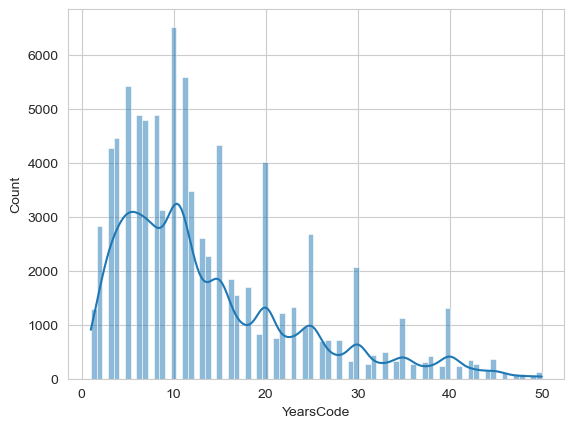

In [26]:
sns.histplot(df['YearsCode'],kde=True)


This histogram visualizes the distribution of respondents' years of coding experience ("YearsCode") with a density line to indicate trends. Here are some insights:

Peak Coding Experience: The most common range for coding experience is between 5 and 10 years. This range has the highest count, indicating that many respondents are relatively early to mid-career professionals.

Drop in Frequency Beyond 10 Years: There is a noticeable decline in the number of respondents with more than 10 years of experience. This could indicate that fewer people have longer careers in coding or that some might shift to other roles as they gain experience.

<Axes: xlabel='YearsCode'>

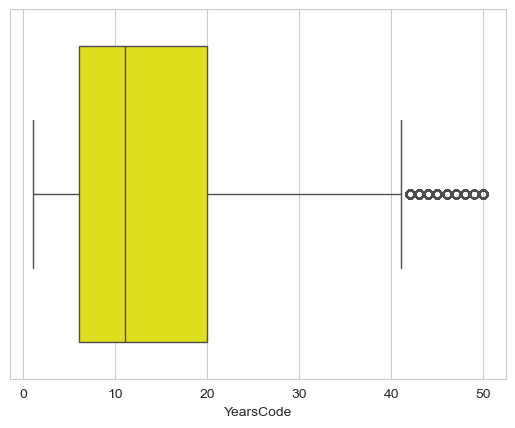

In [27]:
sns.boxplot(x=df["YearsCode"],color='yellow')

This boxplot summarizes the "YearsCode" data, highlighting the spread of coding experience among respondents:

Interquartile Range (IQR): The yellow box spans from roughly 5 to 20 years, representing the middle 50% of respondents' experience.

Median: The line inside the box shows a median of around 10 years, indicating a typical experience level of 10 years.

Outliers: Dots beyond the whiskers represent outliers, with some respondents having over 40 years of experience.

Skewed Distribution: The longer right tail suggests fewer respondents with very high experience levels, indicating a right-skewed distribution.

C:\Users\Jhotika Raja\AppData\Local\Temp\ipykernel_99832\1359268366.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  learn_methods_filtered['Experience_Bucket'] = df['Experience_Bucket'].repeat(len(df_learn.columns)).reset_index(drop=True)
C:\Users\Jhotika Raja\AppData\Local\Temp\ipykernel_99832\1359268366.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  learn_method_counts = learn_methods_filtered.groupby(['LearnMethod', 'Experience_Bucket']).size().reset_index(name='Count')


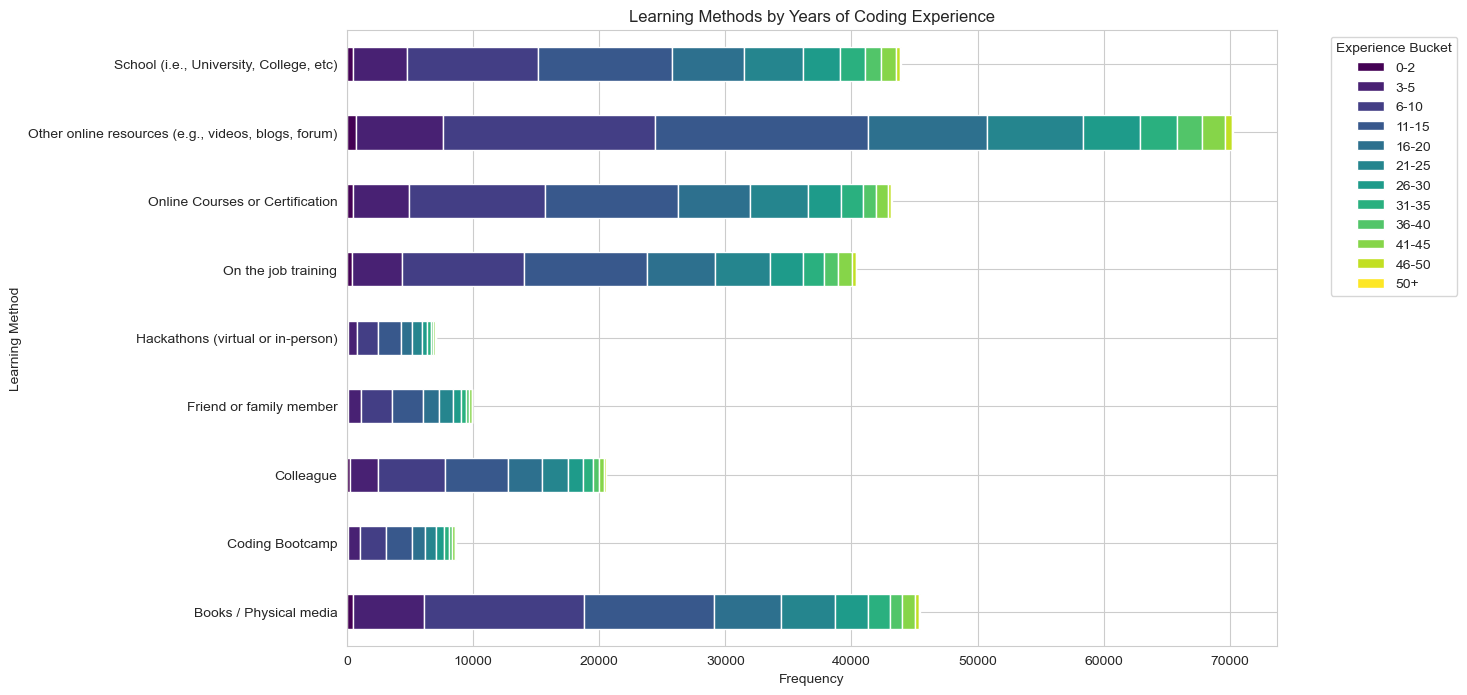

In [28]:
import matplotlib.pyplot as plt
df['Experience_Bucket'] = pd.cut(
    df['YearsCode'],
    bins=[0, 2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, float('inf')],
    labels=['0-2', '3-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '50+'],
    right=False
)
df_learn=df['LearnCode'].str.split(';',expand=True)
df_learn.columns=[f'LearnCode{i}'for i in range(df_learn.shape[1])]
index=df.columns.get_loc('LearnCode')+1
for i,col in enumerate(df_learn.columns):
  df.insert(index+i,col,df_learn[col])
learn_methods = df_learn.melt(value_name="LearnMethod").dropna()
learn_methods_filtered = learn_methods[learn_methods['LearnMethod'] != "Other (please specify):"]
learn_methods_filtered['Experience_Bucket'] = df['Experience_Bucket'].repeat(len(df_learn.columns)).reset_index(drop=True)
learn_method_counts = learn_methods_filtered.groupby(['LearnMethod', 'Experience_Bucket']).size().reset_index(name='Count')
pivot_data = learn_method_counts.pivot(index='LearnMethod', columns='Experience_Bucket', values='Count').fillna(0)
pivot_data.plot(kind='barh', stacked=True, figsize=(12, 8), cmap='viridis')
plt.xlabel('Frequency')
plt.ylabel('Learning Method')
plt.title('Learning Methods by Years of Coding Experience')
plt.legend(title='Experience Bucket', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

This chart shows the popularity of different coding learning methods across experience levels:

Top Methods: School, online resources, courses, and on-the-job training are the most popular across all experience levels.

On-the-job Training: Valued by both new and experienced developers, showing its importance for ongoing skill development.

School & Online Resources: Especially popular among newer coders, who may rely on structured learning initially.

Hackathons & Bootcamps: Preferred by those with 0–10 years of experience, providing practical skills for early-career developers.

Books/Physical Media: Less common but used across all levels, likely favored by those who prefer in-depth learning.

Experienced Coders: Continue to use diverse methods, highlighting the need for lifelong learning in tech.

In [29]:
df_split=df['CodingActivities'].str.split(';',expand=True)
df_split.columns=[f'Coding_activity{i}'for i in range(df_split.shape[1])]
index=df.columns.get_loc('CodingActivities')+1
for i,col in enumerate(df_split.columns):
  df.insert(index+i,df_split.columns[i],df_split[col])
original_columns = df.columns.difference(df_split.columns, sort=False)
selected_columns = ['Coding_activity0', 'Coding_activity1']
final_columns = original_columns.tolist() + selected_columns
filtered_df = df[final_columns]
filtered_df.head()
df=filtered_df
combined_activities = pd.concat([df['Coding_activity0'], df['Coding_activity1']]).dropna()
distinct_activities = combined_activities[combined_activities != "Other (please specify):"].unique()
activity_count={activity:combined_activities[combined_activities==activity].count() for activity in distinct_activities}
activity_counts_df = pd.DataFrame(activity_count.items(), columns=['Activity', 'Frequency']).sort_values(by='Frequency', ascending=False)


In [30]:
original_columns = df.columns.difference(df_split.columns, sort=False)
selected_columns = ['Coding_activity0', 'Coding_activity1']
final_columns = original_columns.tolist() + selected_columns
filtered_df = df[final_columns]
filtered_df.head()
df=filtered_df
df.head()

ResponseId                      MainBranch  \
0           1                   None of these   
1           2  I am a developer by profession   
2           3  I am a developer by profession   
3           4  I am a developer by profession   
4           5  I am a developer by profession   

                                    CodingActivities  \
0                                      Not Specified   
1  Hobby;Contribute to open-source projects;Boots...   
2  Hobby;Professional development or self-paced l...   
3                                              Hobby   
4  Hobby;Contribute to open-source projects;Profe...   

                                        EdLevel  \
0  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
1  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                           LearnCode              LearnCode0  \
0                                                NaN                     NaN   
1  Books / Physical media;Colleague;Friend or fam...  Books / Physical media   
2  Books / Physical media;Colleague;On the job tr...  Books / Physical media   
3  Colleague;Friend or family member;Other online...               Colleague   
4  Books / Physical media;Online Courses or Certi...  Books / Physical media   

                        LearnCode1  \
0                              NaN   
1                        Colleague   
2                        Colleague   
3          Friend or family member   
4  Online Courses or Certification   

                                          LearnCode2  \
0                                                NaN   
1                            Friend or family member   
2                                On the job training   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                          LearnCode3  \
0                                                NaN   
1                  Hackathons (virtual or in-person)   
2  Other online resources (e.g., videos, blogs, f...   
3            School (i.e., University, College, etc)   
4            School (i.e., University, College, etc)   

                                LearnCode4  ...       MiscTechHaveWorkedWith  \
0                                      NaN  ...                Not Specified   
1          Online Courses or Certification  ...  Electron;React Native;Tauri   
2  School (i.e., University, College, etc)  ...                Not Specified   
3                                     None  ...                Not Specified   
4                                     None  ...                Not Specified   

                       ToolsTechHaveWorkedWith  \
0                                Not Specified   
1  Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn   
2             Cargo;Docker;Kubernetes;Make;Nix   
3               Homebrew;npm;Vite;Webpack;Yarn   
4                      Docker;npm;Webpack;Yarn   

                             ToolsTechWantToWorkWith  \
0                                      No Preference   
1  Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...   
2                               Cargo;Kubernetes;Nix   
3                                  Homebrew;npm;Vite   
4                                    Docker;npm;Yarn   

                    NEWCollabToolsHaveWorkedWith NEWCollabToolsWantToWorkWith  \
0                             Visual Studio Code                Not Specified   
1                         Vim;Visual Studio Code       Vim;Visual Studio Code   
2                                    Emacs;Helix                  Emacs;Helix   
3  IntelliJ IDEA;Vim;Visual Studio Code;WebStorm   IntelliJ IDEA;Vim;WebStorm   
4                         Vim;Visual Studio Code       Vim;Visual Studio Code   

                             OpSysProfessional use AISearchHaveWorkedWith 

In [31]:
combined_activities = pd.concat([df['Coding_activity0'], df['Coding_activity1']]).dropna()
distinct_activities = combined_activities[combined_activities != "Other (please specify):"].unique()
activity_count={activity:combined_activities[combined_activities==activity].count() for activity in distinct_activities}
activity_counts_df = pd.DataFrame(activity_count.items(), columns=['Activity', 'Frequency']).sort_values(by='Frequency', ascending=False)



In [32]:
filtered_df['Coding_activity0'].value_counts()

Coding_activity0
Hobby                                                                  51942
Not Specified                                                          15420
I don’t code outside of work                                            8809
Professional development or self-paced learning from online courses     5232
Contribute to open-source projects                                      2592
Bootstrapping a business                                                2382
Freelance/contract work                                                 1778
School or academic work                                                  753
Other (please specify):                                                  276
Name: count, dtype: int64

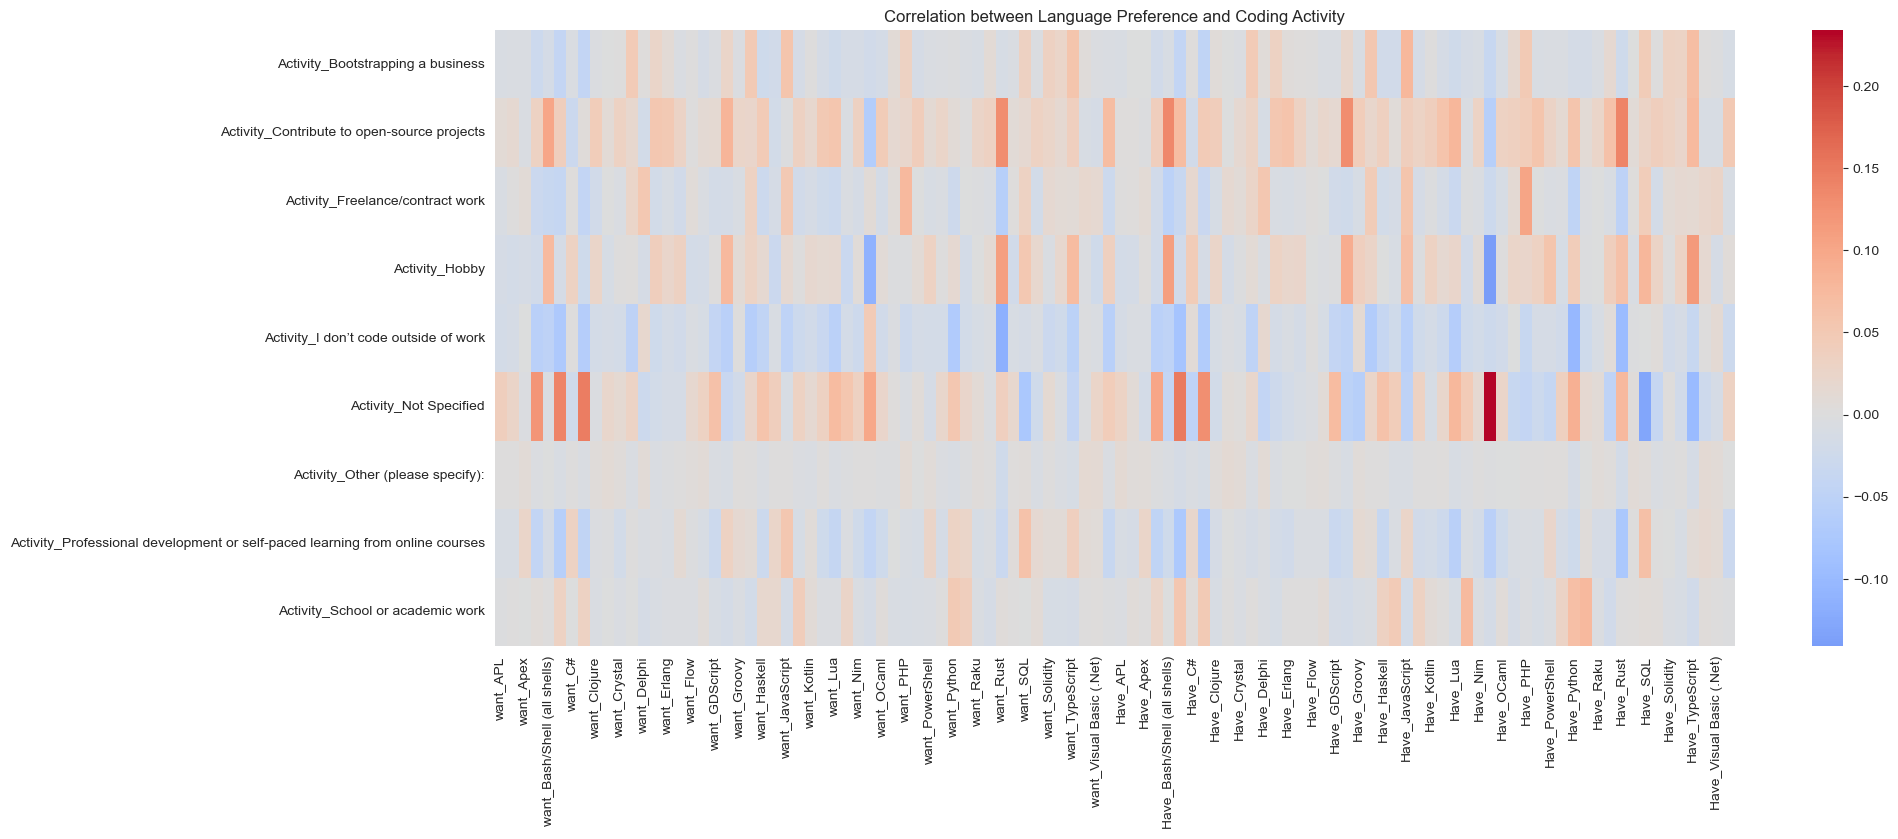

In [33]:
activities = pd.get_dummies(filtered_df[['Coding_activity0', 'Coding_activity1']], prefix='Activity')
df_activities = activities.T.groupby(level=0).max().T
language_want = filtered_df['LanguageWantToWorkWith'].str.get_dummies(sep=';')
language_have = filtered_df['LanguageHaveWorkedWith'].str.get_dummies(sep=';')
df_activities = df_activities.reindex(filtered_df.index, fill_value=0)
language_want = language_want.reindex(filtered_df.index, fill_value=0)
language_have = language_have.reindex(filtered_df.index, fill_value=0)
df_with_dummies = pd.concat([filtered_df, df_activities, language_want.add_prefix('want_'), language_have.add_prefix('Have_')], axis=1)

# Step 5: Define activity and language columns for correlation
activity_col = df_activities.columns
language_col = [col for col in df_with_dummies.columns if col.startswith('Have_') or col.startswith('want_')]
corr_matrix = df_with_dummies[activity_col.union(language_col)].corr().loc[activity_col, language_col]
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation between Language Preference and Coding Activity')
plt.show()


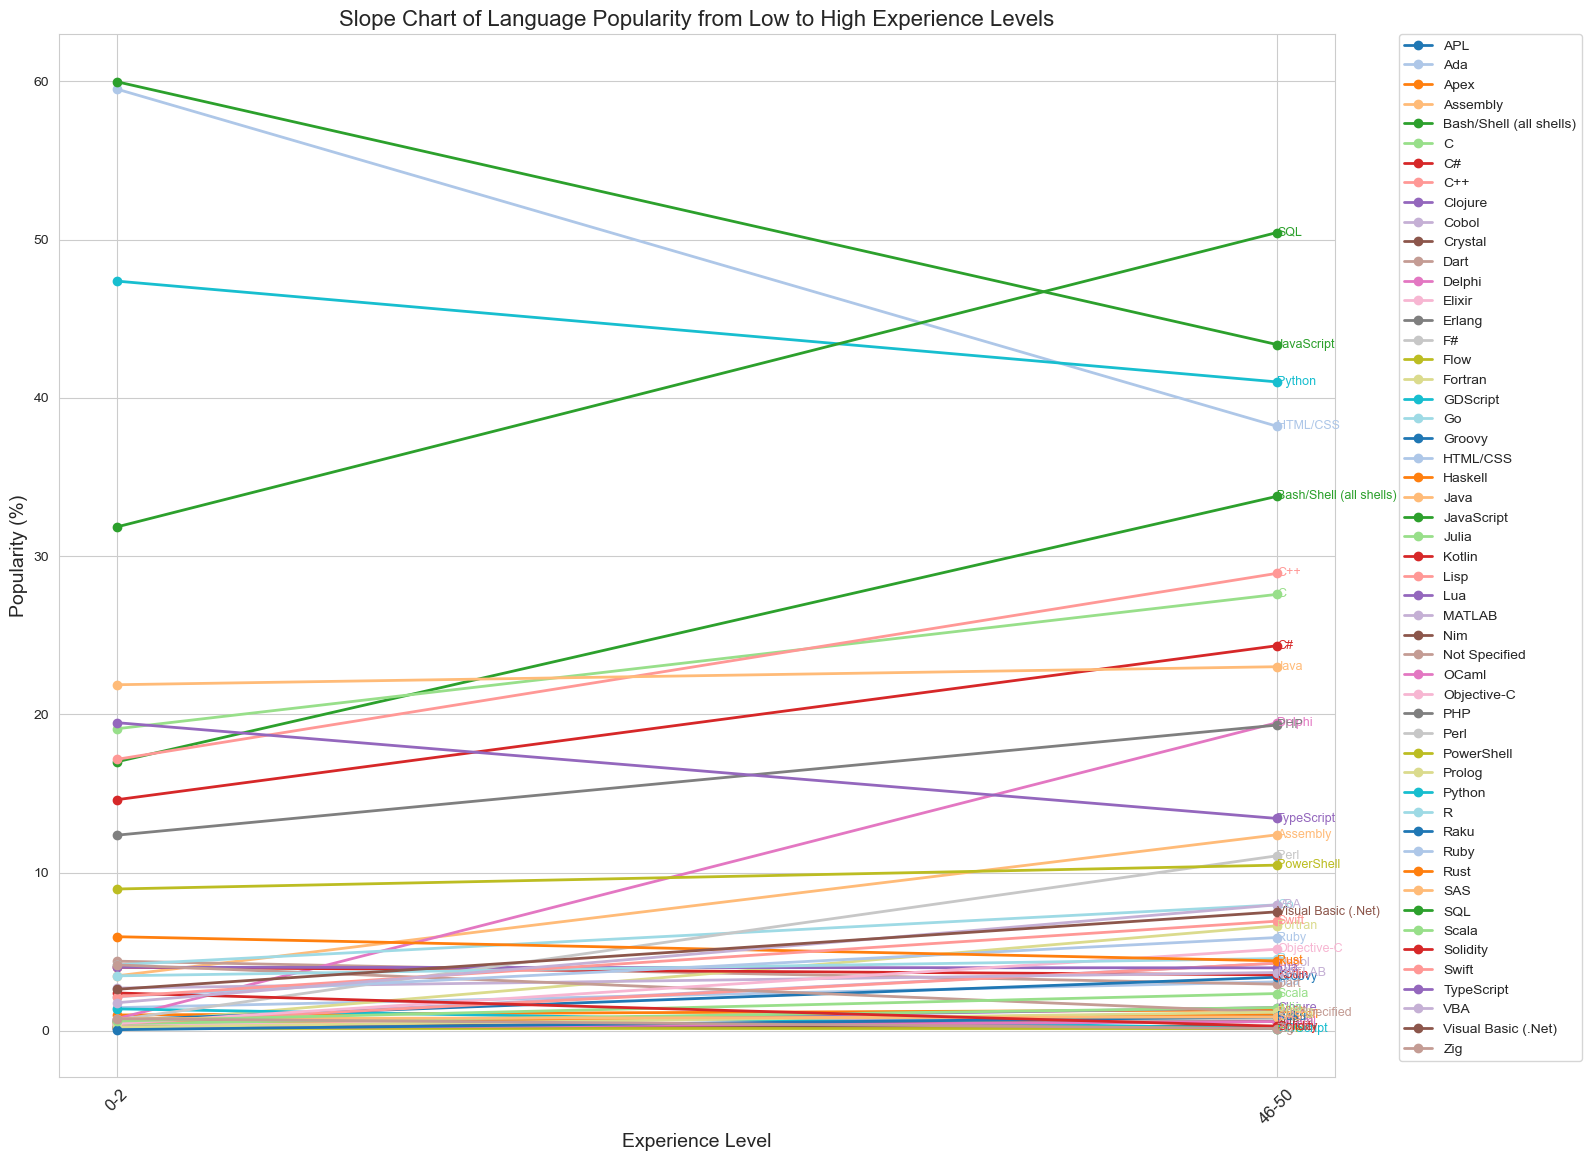

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define bins and labels for categorizing experience levels
bins = [0, 2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
labels = ['0-2', '3-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50']

# Create 'Experience_Bucket' by binning 'YearsCode' column
filtered_df['Experience_Bucket'] = pd.cut(filtered_df['YearsCode'], bins=bins, labels=labels, right=False)

# Convert 'LanguageHaveWorkedWith' column to dummy variables
language_have = filtered_df['LanguageHaveWorkedWith'].str.get_dummies(sep=';')

# Concatenate 'Experience_Bucket' with the dummy variables
language_popularity_by_experience = pd.concat([filtered_df['Experience_Bucket'], language_have], axis=1)

# Group by 'Experience_Bucket' with observed=False to avoid FutureWarning
language_popularity_by_experience = language_popularity_by_experience.groupby('Experience_Bucket', observed=False).mean() * 100

# Select only the first and last experience levels for the slope chart
language_popularity_start_end = language_popularity_by_experience.iloc[[0, -1]]

# Set up the plot with increased figsize for better readability
plt.figure(figsize=(16, 12))
colors = sns.color_palette("tab20", n_colors=len(language_popularity_start_end.columns))

# Plot each language's popularity trend from low to high experience levels
for i, (language, color) in enumerate(zip(language_popularity_start_end.columns, colors)):
    plt.plot(
        language_popularity_start_end.index,
        language_popularity_start_end[language],
        marker="o",
        label=language,
        color=color,
        linewidth=2
    )
    # Annotate the end point of each line with the language name
    plt.text(
        x=language_popularity_start_end.index[-1],
        y=language_popularity_start_end[language].iloc[-1],
        s=language,
        color=color,
        va="center",
        fontsize=9,
    )

# Add titles and labels
plt.title("Slope Chart of Language Popularity from Low to High Experience Levels", fontsize=16)
plt.xlabel("Experience Level", fontsize=14)
plt.ylabel("Popularity (%)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Position the legend outside the plot on the right
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Adjust layout for clarity
plt.tight_layout()
plt.show()


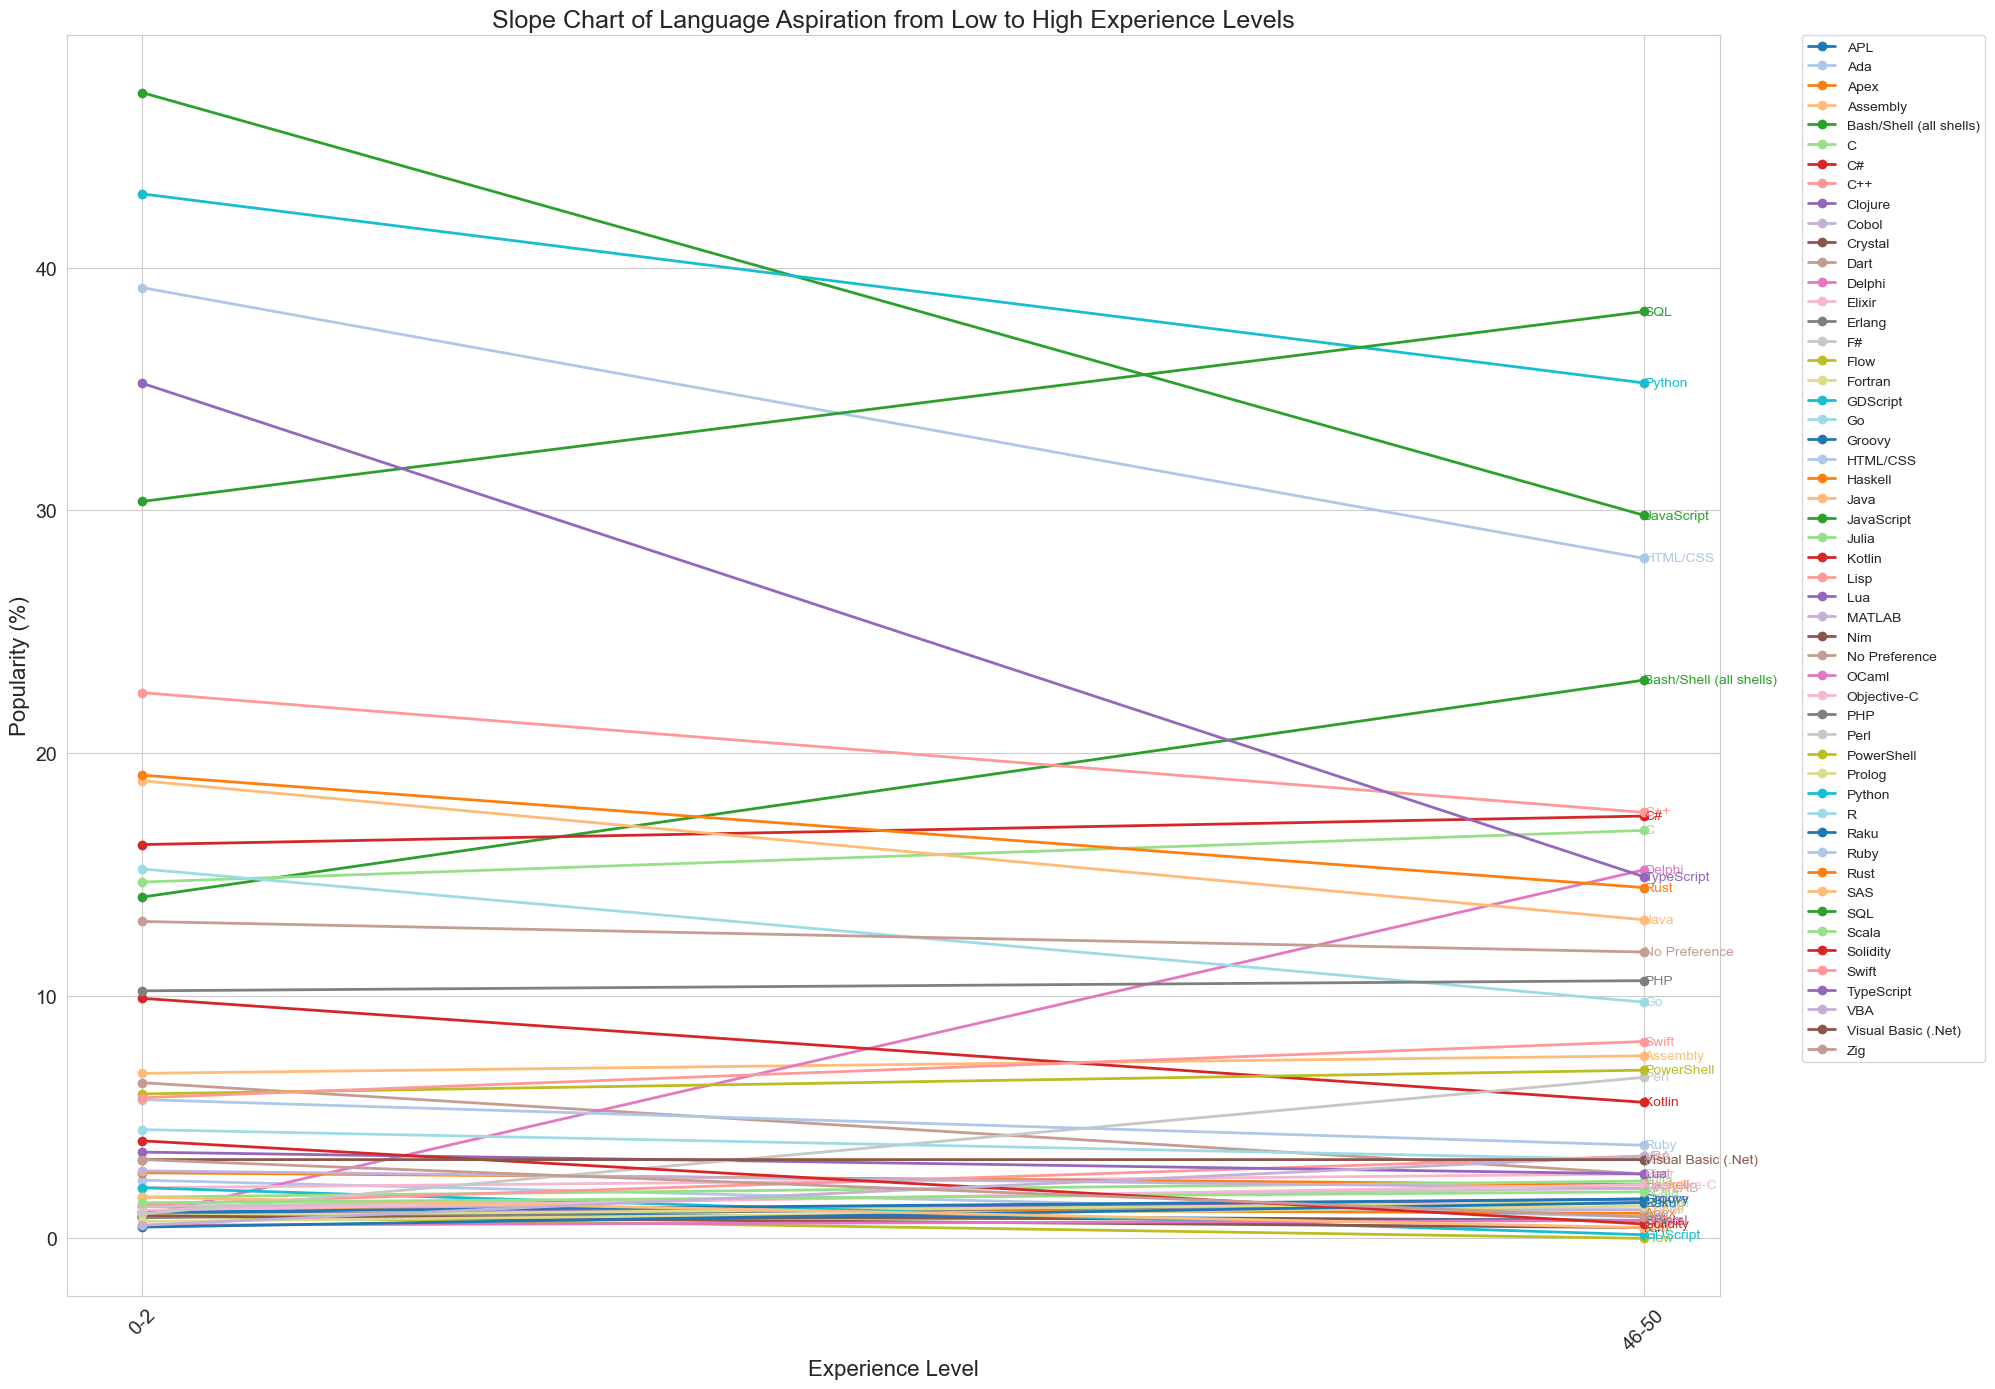

In [35]:
language_want = filtered_df['LanguageWantToWorkWith'].str.get_dummies(sep=';')
language_popularity_want = pd.concat([filtered_df['Experience_Bucket'], language_want], axis=1)
language_popularity_by_experience_want = language_popularity_want.groupby('Experience_Bucket', observed=False).mean() * 100
language_popularity_start_end_want = language_popularity_by_experience_want.iloc[[0, -1]]

plt.figure(figsize=(20, 14))
colors = sns.color_palette("tab20", n_colors=len(language_popularity_by_experience_want.columns))

for i, (language, color) in enumerate(zip(language_popularity_by_experience_want.columns, colors)):
    plt.plot(
        language_popularity_start_end_want.index,
        language_popularity_start_end_want[language],
        marker="o",
        color=color,
        linewidth=2,
        label=language  
    )
    plt.text(
        x=language_popularity_start_end_want.index[-1],
        y=language_popularity_start_end_want[language].iloc[-1],
        s=language,
        color=color,
        va="center",
        fontsize=10,
    )


plt.title("Slope Chart of Language Aspiration from Low to High Experience Levels", fontsize=18)
plt.xlabel("Experience Level", fontsize=16)
plt.ylabel("Popularity (%)", fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()


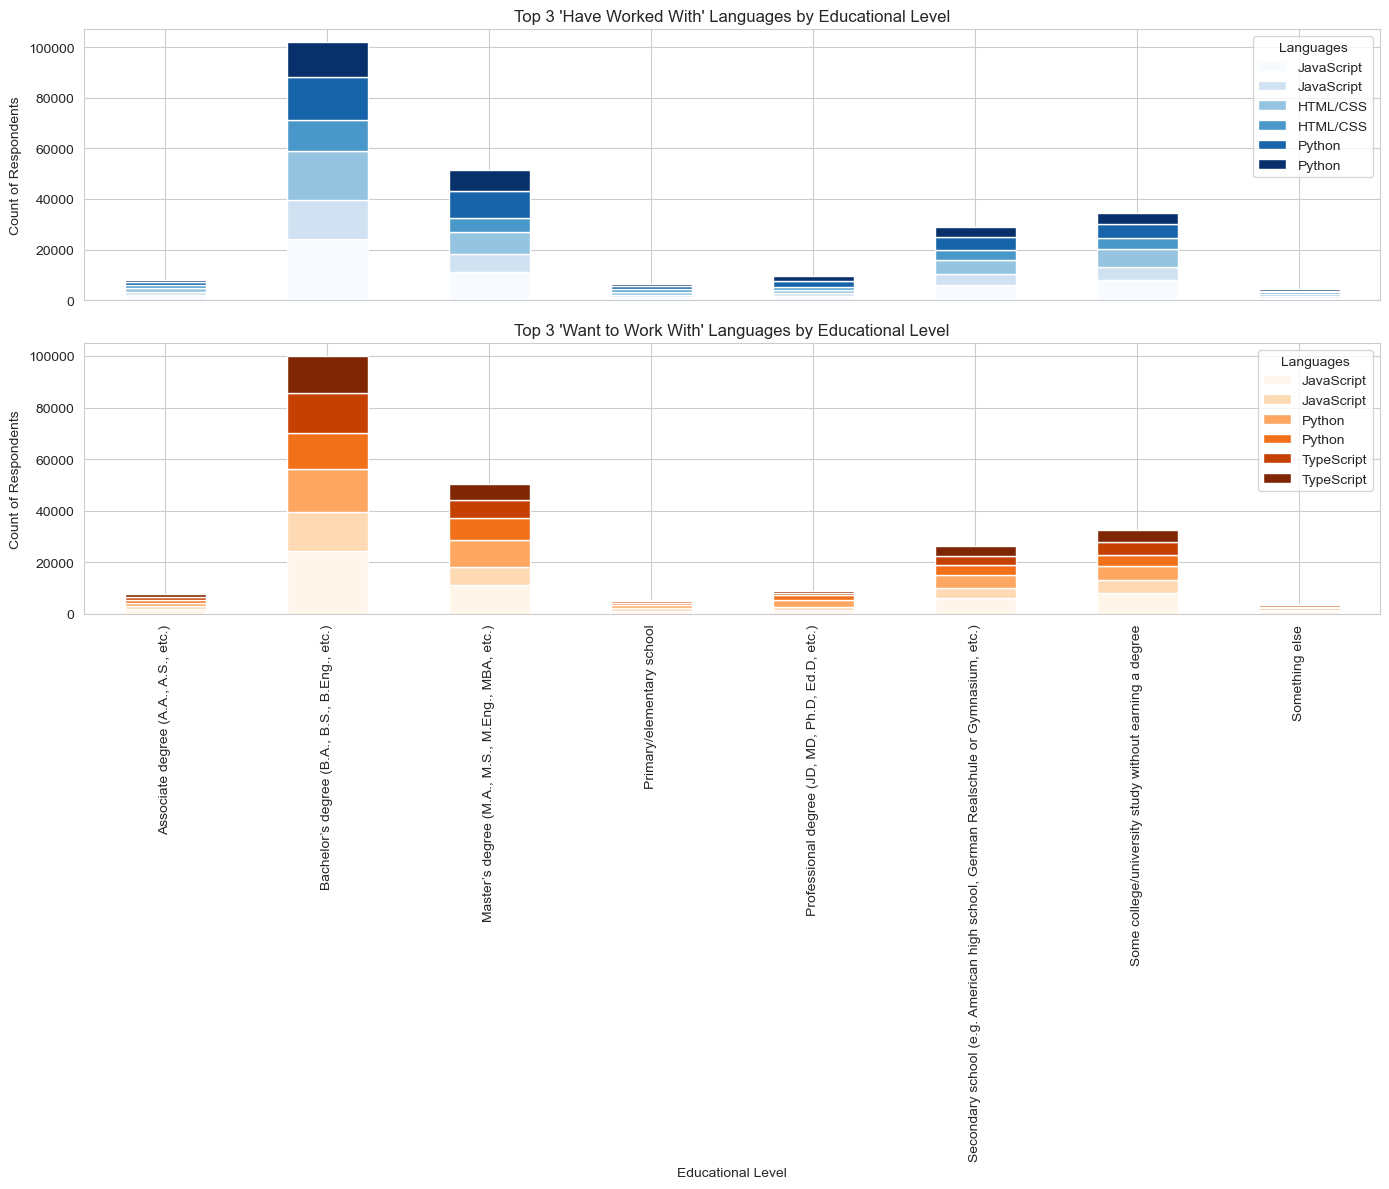

In [36]:
top_3_have_languages = language_have.sum().nlargest(3).index.tolist()
top_3_want_languages = language_want.sum().nlargest(3).index.tolist()
filtered_df_expanded = filtered_df.copy()
filtered_df_expanded['EdLevel'] = filtered_df_expanded['EdLevel'].fillna('').str.split(';')
filtered_df_expanded = filtered_df_expanded.explode('EdLevel')
filtered_df_expanded = pd.concat([filtered_df_expanded, language_have, language_want], axis=1)
have_counts = filtered_df_expanded.groupby('EdLevel')[top_3_have_languages].sum()
want_counts = filtered_df_expanded.groupby('EdLevel')[top_3_want_languages].sum()
fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)
have_counts.plot(kind='bar', stacked=True, ax=axes[0], colormap='Blues')
axes[0].set_title("Top 3 'Have Worked With' Languages by Educational Level")
axes[0].set_ylabel("Count of Respondents")
axes[0].legend(title="Languages")
want_counts.plot(kind='bar', stacked=True, ax=axes[1], colormap='Oranges')
axes[1].set_title("Top 3 'Want to Work With' Languages by Educational Level")
axes[1].set_ylabel("Count of Respondents")
axes[1].legend(title="Languages")
plt.xlabel("Educational Level")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Overall Observations

JavaScript Dominance: It's evident that JavaScript is the most popular language across all educational levels, both in terms of having worked with it and wanting to work with it.

Python's Rise: Python is the second most popular language for both "Have Worked With" and "Want to Work With," indicating its growing popularity and versatility.

HTML/CSS Importance: HTML/CSS is a significant language, especially for those with lower educational levels. This suggests its importance for web development and design roles.

TypeScript Gaining Ground: TypeScript is showing promise, especially among those with higher education levels, indicating its potential as a preferred language for complex web applications.

Insights by Educational Level

Primary/Elementary School:

HTML/CSS: It is the most popular language for this group, likely due to its accessibility and use in early education.

JavaScript: It is the second most popular, showing that even at this early stage, there is interest in web development.

Secondary School:

JavaScript: It becomes the dominant language, reflecting its widespread use in web development and programming education.

HTML/CSS: Remains important, likely due to its foundational nature in web development.

Some College/University Study:

JavaScript: Continues to be the top choice, solidifying its position as a core language for web development.

Python: Gains significant traction, likely due to its use in data science, machine learning, and other fields.

Associate Degree:

JavaScript: Remains the most popular, indicating its relevance for various technical roles.

Python: Continues to grow in popularity, potentially due to its use in data analysis and automation.

Bachelor's Degree:

JavaScript: Maintains its dominance, reflecting its importance in web development and beyond.

Python: Shows a strong presence, likely due to its use in data science, machine learning, and other fields.

Master's Degree:

JavaScript: Remains the top choice, emphasizing its versatility and applicability in various domains.

TypeScript: Gains significant popularity, suggesting its preference for large-scale, complex web applications.

Professional Degree (JD, MD, Ph.D, Ed.D, etc.):

JavaScript: Continues to be the most popular, possibly due to its use in research and data analysis.

Python: Shows a strong presence, likely due to its use in data science and other research-related fields.

In [37]:
df.drop('CodingActivities',axis=1,inplace=True)

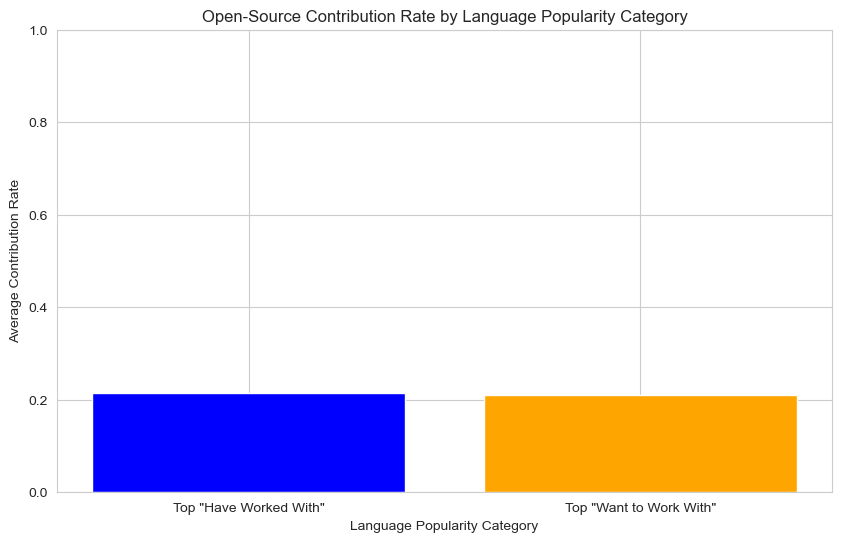

In [40]:
filtered_df['ContributesOpenSource']= ((filtered_df['Coding_activity0'] == 'Contribute to open-source projects') |
    (filtered_df['Coding_activity1'] == 'Contribute to open-source projects')
).astype(int)
filtered_df['UsesTopHaveLanguage'] = language_have[top_3_have_languages].sum(axis=1) > 0
filtered_df['UsesTopWantLanguage'] = language_want[top_3_want_languages].sum(axis=1) > 0
have_contribution_rate = filtered_df[filtered_df['UsesTopHaveLanguage']]['ContributesOpenSource'].mean()
want_contribution_rate = filtered_df[filtered_df['UsesTopWantLanguage']]['ContributesOpenSource'].mean()
contribution_rates = pd.DataFrame({
    'Language Category': ['Top "Have Worked With"', 'Top "Want to Work With"'],
    'Open Source Contribution Rate': [have_contribution_rate, want_contribution_rate]
})
plt.figure(figsize=(10, 6))
plt.bar(contribution_rates['Language Category'], contribution_rates['Open Source Contribution Rate'], color=['blue', 'orange'])
plt.title("Open-Source Contribution Rate by Language Popularity Category")
plt.ylabel("Average Contribution Rate")
plt.xlabel("Language Popularity Category")
plt.ylim(0, 1)
plt.show()

Overall Observations

Open-Source Contributions: The plot shows the average open-source contribution rate for languages categorized as "Top 'Have Worked With'" and "Top 'Want to Work With'" categories.

Contribution Rate Similarity: Interestingly, there is a very close similarity in the average contribution rate between these two categories, indicating that developers who have worked with popular languages are equally likely to contribute to open-source projects as those who want to work with them.

In [42]:
dev_type_split = df['DevType'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
dev_type_split.name = 'Role'
webframe_have_split = df['WebframeHaveWorkedWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
webframe_have_split.name = 'Framework_Have'
webframe_want_split = df['WebframeWantToWorkWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
webframe_want_split.name = 'Framework_Want'
df_expanded = df[['DevType']].join(dev_type_split).join(webframe_have_split).join(webframe_want_split)
framework_have_counts = df_expanded.groupby(['Role', 'Framework_Have']).size().reset_index(name='Count_Have')
framework_want_counts = df_expanded.groupby(['Role', 'Framework_Want']).size().reset_index(name='Count_Want')
framework_counts = pd.merge(framework_have_counts, framework_want_counts, left_on=['Role', 'Framework_Have'], right_on=['Role', 'Framework_Want'], how='outer').fillna(0)
framework_counts.rename(columns={'Framework_Have': 'Framework'}, inplace=True)
framework_counts_long = framework_counts.melt(id_vars=['Role', 'Framework'], value_vars=['Count_Have', 'Count_Want'],
                                              var_name='Type', value_name='Count')
fig = px.bar(
    framework_counts_long,
    x='Role',
    y='Count',
    color='Framework',
    facet_col='Type',
    title="Framework Preferences by Developer Role",
    labels={'Role': 'Developer Role', 'Count': 'Number of Developers', 'Type': 'Usage Type'},
    barmode='group',
    height=600
)
fig.update_layout(
    xaxis_title="Developer Role",
    yaxis_title="Framework Count",
    legend_title="Web Framework",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)
fig.show()


Overall Popularity and Role-Based Preferences:

Dominant Frameworks: React, Angular, and Node.js are widely adopted across developer roles.
Role-Specific Choices:
Front-end: React, Angular, and Vue.js are popular for UI development.
Back-end/Full-stack: Node.js, Django, and Spring are preferred for server-side tasks.
Mobile: React Native and Flutter are favored for cross-platform mobile apps.
Trends and Adoption Insights:

Growth Indicators: Frameworks with higher "Want to Work With" values show potential for increased adoption.
Stable vs. Declining: Stable frameworks have balanced usage and interest, while declining frameworks show higher past use.
Factors Influencing Framework Choices:

Experience and Complexity: Framework preferences often align with experience level and project demands.
Community Support: Frameworks with active communities and resources tend to sustain popularity. 

In [43]:
have_worked = df['WebframeHaveWorkedWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
have_worked.name = 'Framework'
want_to_work = df['WebframeWantToWorkWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
want_to_work.name = 'Framework'
have_worked_counts = have_worked.value_counts().reset_index()
have_worked_counts.columns = ['Framework', 'HaveWorkedCount']

want_to_work_counts = want_to_work.value_counts().reset_index()
want_to_work_counts.columns = ['Framework', 'WantToWorkCount']
framework_comparison = pd.merge(have_worked_counts, want_to_work_counts, on='Framework', how='outer').fillna(0)
framework_comparison['Gap'] = framework_comparison['WantToWorkCount'] - framework_comparison['HaveWorkedCount']
framework_comparison = framework_comparison.sort_values(by='Gap', ascending=False)
fig = px.bar(
    framework_comparison,
    x='Gap',
    y='Framework',
    color='Gap',
    color_continuous_scale=px.colors.diverging.RdYlGn,
    title="Difference in Current vs. Desired Usage of Web Frameworks",
    labels={'Gap': 'Interest Gap (Want - Have)', 'Framework': 'Web Framework'}
)
fig.update_layout(
    xaxis_title="Interest Gap",
    yaxis_title="Framework",
    coloraxis_showscale=False
)
fig.show()

Insights by Framework

Svelte and Deno Gaining Momentum: Svelte and Deno have the largest positive interest gaps, suggesting significant growth in developer interest and potential adoption.

Solid.js and Next.js Popularity: Solid.js and Next.js also have substantial positive interest gaps, indicating a growing trend towards these frameworks.

Stable Frameworks: Frameworks like Remix, Qwik, Blazor, and Phoenix have moderate positive interest gaps, suggesting a stable level of usage and interest.

Smaller Interest Gaps: Frameworks like Fastify, Lit, Vue.js, Elm, FastAPI, Nuxt.js have smaller positive interest gaps, indicating a more gradual increase in their popularity.

Declining Interest: Frameworks like jQuery, Node.js, and WordPress have a significant negative interest gap, indicating a decline in their popularity and a shift towards more modern frameworks.

Stable Frameworks: Frameworks like React, ASP.NET, Express, and Flask have a relatively small negative interest gap, suggesting a stable level of usage and interest.

Angular and AngularJS: Angular shows a moderate decline in interest, while AngularJS has a more significant decline, indicating a shift towards newer versions and alternative frameworks.

In [44]:
have_worked_data = df['WebframeHaveWorkedWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
have_worked_data.name = 'Framework'
want_to_work_data = df['WebframeWantToWorkWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
want_to_work_data.name = 'Framework'
df_have_worked = df[['Country']].join(have_worked_data)
df_have_worked['Preference'] = 'Have Worked With'
df_want_to_work = df[['Country']].join(want_to_work_data)
df_want_to_work['Preference'] = 'Want To Work With'
df_combined = pd.concat([df_have_worked, df_want_to_work])
fig = px.treemap(
    df_combined,
    path=['Country', 'Preference', 'Framework'],
    title="Regional Web Framework Preferences",
    color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

Overall Observations

React Dominance: React is the most popular framework in terms of both current usage ("Have Worked With") and desired usage ("Want to Work With") across most regions.

Node.js Prevalence: Node.js is also widely used and desired, particularly in regions like the United States and India.

jQuery Decline: jQuery shows a significant decline in popularity, with more developers indicating they have worked with it than wanting to work with it in the future.

Regional Variations: There are some regional variations in framework preferences, with certain frameworks being more popular in specific regions.

<Figure size 1200x800 with 0 Axes>

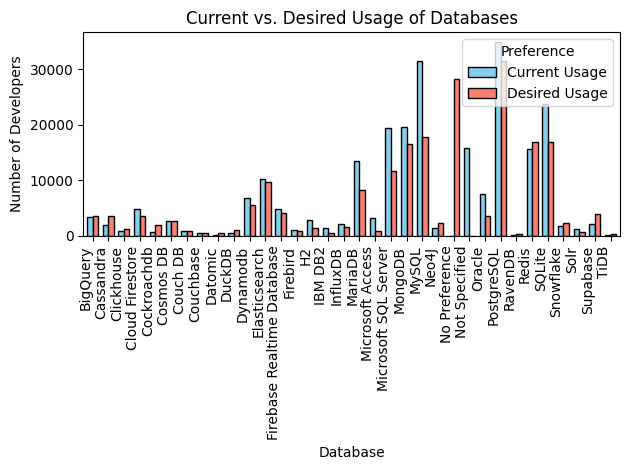

In [ ]:
db_have_split = df['DatabaseHaveWorkedWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
db_have_split.name = 'Database'

db_want_split = df['DatabaseWantToWorkWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
db_want_split.name = 'Database'
df_have = pd.DataFrame({'Database': db_have_split, 'Preference': 'Current Usage'})
df_want = pd.DataFrame({'Database': db_want_split, 'Preference': 'Desired Usage'})
db_preferences = pd.concat([df_have, df_want])
db_counts = db_preferences.groupby(['Database', 'Preference']).size().reset_index(name='Count')
db_counts_pivot = db_counts.pivot(index='Database', columns='Preference', values='Count').fillna(0)
db_counts_pivot['Gap'] = db_counts_pivot['Desired Usage'] - db_counts_pivot['Current Usage']
plt.figure(figsize=(12, 8))
db_counts_pivot[['Current Usage', 'Desired Usage']].plot(kind='bar', stacked=False, width=0.7, color=['skyblue', 'salmon'], edgecolor='black')
plt.title("Current vs. Desired Usage of Databases")
plt.xlabel("Database")
plt.ylabel("Number of Developers")
plt.legend(title="Preference", loc='upper right')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

MySQL and PostgreSQL: These relational databases continue to be the preferred choice for many developers, with a stable level of usage and interest.

MongoDB and Cassandra: These NoSQL databases have a significant positive interest gap, indicating a growing trend towards their adoption for handling unstructured data and scalability.

Cloud-Based Databases: Cloud-based databases like Firebase Realtime Database and Cosmos DB are gaining popularity, especially for real-time applications and large-scale data storage.

Traditional SQL Databases: Traditional SQL databases like Microsoft SQL Server and Oracle are still widely used, but their growth in desired usage is less pronounced compared to NoSQL databases.

In [54]:
db_have_split = df['DatabaseHaveWorkedWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
db_want_split = df['DatabaseWantToWorkWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
df_have = pd.DataFrame({'Country': df['Country'].repeat(db_have_split.groupby(level=0).size()), 'Database': db_have_split, 'Preference': 'Current Usage'})
df_want = pd.DataFrame({'Country': df['Country'].repeat(db_want_split.groupby(level=0).size()), 'Database': db_want_split, 'Preference': 'Aspiration'})
db_preferences = pd.concat([df_have, df_want])
db_counts = db_preferences.groupby(['Country', 'Database', 'Preference']).size().reset_index(name='Count')
fig = px.treemap(
    db_counts,
    path=['Country', 'Preference', 'Database'],
    values='Count',
    color='Preference',
    color_discrete_map={'Current Usage': 'skyblue', 'Aspiration': 'salmon'},
    title="Regional Database Preferences: Current Usage vs. Aspiration"
)

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

Overall Observations

MySQL and PostgreSQL Dominance: MySQL and PostgreSQL are the most popular databases across most regions, both in terms of current usage and aspiration.

NoSQL Databases Gaining Interest: NoSQL databases like Redis and MongoDB show a significant increase in aspiration compared to current usage, indicating a growing trend towards their adoption.

Regional Variations: There are some regional variations in database preferences, with certain databases being more popular in specific regions.

Specific Insights by Region

United States: PostgreSQL and MySQL are the most popular databases, with a strong preference for PostgreSQL in terms of aspiration.

Europe: MySQL and PostgreSQL are also popular in European countries, with some variations in the preference for other databases like Redis and MongoDB.

India: MySQL and PostgreSQL are the most popular databases, with a significant interest gap for PostgreSQL, indicating a growing demand for this database.

Other Regions: In other regions like Asia and South America, MySQL and PostgreSQL are also prominent, indicating their global appeal.

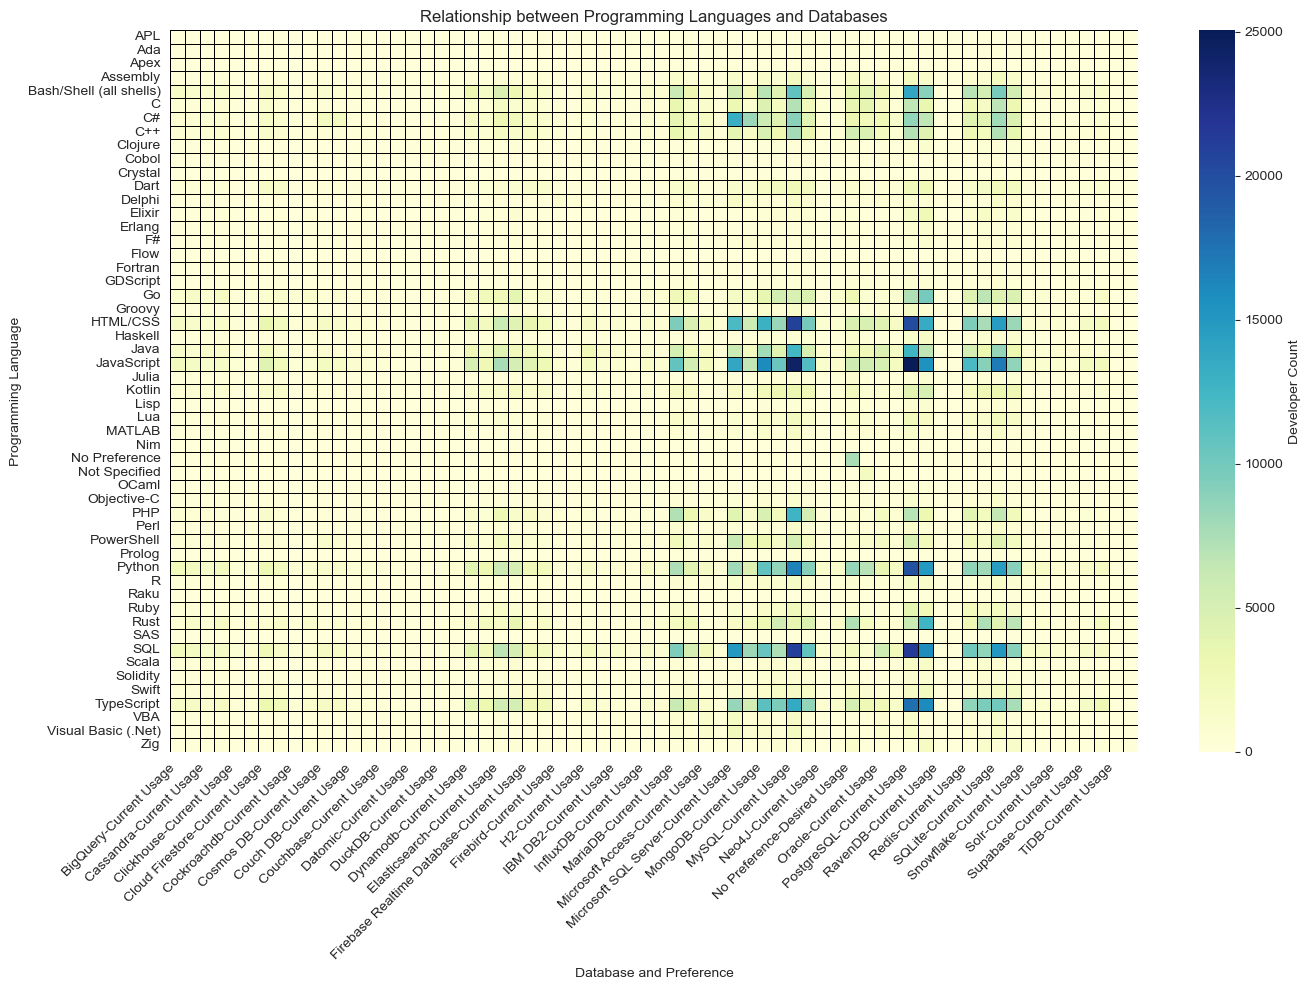

In [55]:
language_have_split = df['LanguageHaveWorkedWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
language_have_split.name = 'Language'
language_want_split = df['LanguageWantToWorkWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
language_want_split.name = 'Language'
df_current = pd.DataFrame({'Language': language_have_split}).join(pd.DataFrame({'Database': db_have_split}), how='inner')
df_current['Preference'] = 'Current Usage'
df_desired = pd.DataFrame({'Language': language_want_split}).join(pd.DataFrame({'Database': db_want_split}), how='inner')
df_desired['Preference'] = 'Desired Usage'
combined_df = pd.concat([df_current, df_desired], ignore_index=True)
usage_counts = combined_df.groupby(['Language', 'Database', 'Preference']).size().reset_index(name='Count')
pivot_data = usage_counts.pivot_table(index='Language', columns=['Database', 'Preference'], values='Count', fill_value=0)
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_data, cmap='YlGnBu', linewidths=0.5, linecolor='black', cbar_kws={'label': 'Developer Count'})
plt.title('Relationship between Programming Languages and Databases')
plt.xlabel('Database and Preference')
plt.ylabel('Programming Language')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Overall Observations

MySQL and PostgreSQL Dominance: MySQL and PostgreSQL are the most popular databases across most regions, both in terms of current usage and aspiration.

NoSQL Databases Gaining Interest: NoSQL databases like Redis and MongoDB show a significant increase in aspiration compared to current usage, indicating a growing trend towards their adoption.

Regional Variations: There are some regional variations in database preferences, with certain databases being more popular in specific regions.

Specific Insights by Region

United States: PostgreSQL and MySQL are the most popular databases, with a strong preference for PostgreSQL in terms of aspiration.

Europe: MySQL and PostgreSQL are also popular in European countries, with some variations in the preference for other databases like Redis and MongoDB.

India: MySQL and PostgreSQL are the most popular databases, with a significant interest gap for PostgreSQL, indicating a growing demand for this database.

Other Regions: In other regions like Asia and South America, MySQL and PostgreSQL are also prominent, indicating their global appeal.

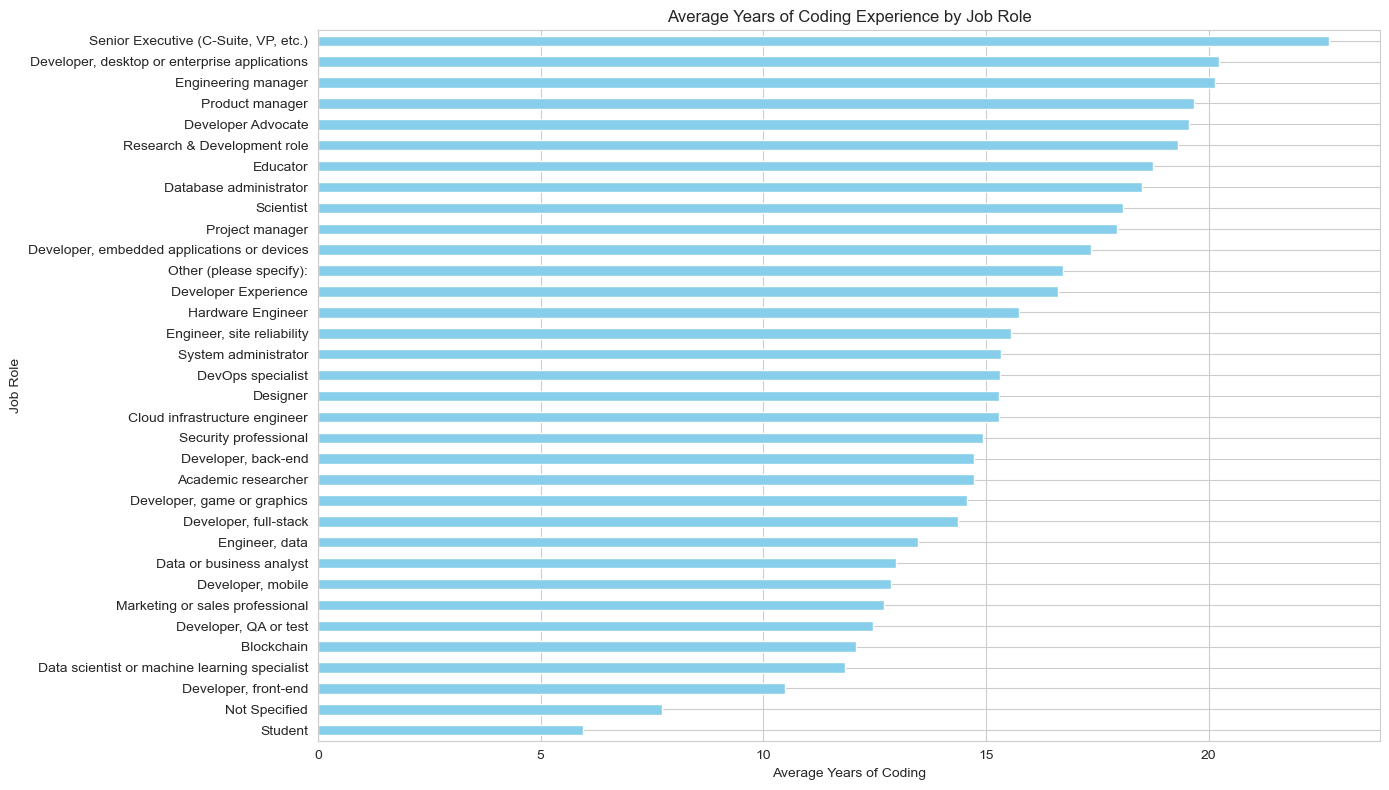

In [56]:
average_experience = filtered_df.groupby('DevType')['YearsCode'].mean().sort_values()
plt.figure(figsize=(14, 8))
average_experience.plot(kind='barh', color='skyblue')
plt.title("Average Years of Coding Experience by Job Role")
plt.xlabel("Average Years of Coding")
plt.ylabel("Job Role")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Overall Observations

Wide Range of Experience: The plot shows a wide range of average coding experience across different job roles, from less than 5 years to over 20 years.

Senior Roles and Experience: Senior roles like Senior Executive, Engineering Manager, and Product Manager tend to have higher average coding experience.

Developer Roles: Developer roles like Developer, Full-stack, Data Scientist, and Machine Learning Specialist generally have a moderate to high level of coding experience.

Non-Technical Roles: Non-technical roles like Marketing or Sales Professional and Student have lower average coding experience.

Specific Insights by Job Role

Senior Executive: Senior Executives have the highest average coding experience, indicating a strong technical background and experience in the industry.

Engineering Manager: Engineering Managers also have a high level of coding experience, reflecting their technical leadership roles.

Developer Roles: Developer roles like Full-stack Developer, Data Scientist, and Machine Learning Specialist have a moderate to high level of coding experience, indicating the technical demands of these roles.

Non-Technical Roles: Non-technical roles like Marketing or Sales Professional and Student have lower average coding experience, as these roles typically require less technical expertise.

In [57]:
expanded_rows = []

for idx, row in df.iterrows():
    dev_types = row['DevType'].split(';') if pd.notna(row['DevType']) else []
    languages_have = row['LanguageHaveWorkedWith'].split(';') if pd.notna(row['LanguageHaveWorkedWith']) else []

    for dev_type in dev_types:
        for lang_have in languages_have:
            expanded_rows.append({
                'JobRole': dev_type.strip(),
                'Language': lang_have.strip()
            })

# Create a new DataFrame from the expanded rows
have_summary = pd.DataFrame(expanded_rows)

# Step 2: Aggregate data by counting occurrences of each language for each job role
have_summary = have_summary.groupby(['JobRole', 'Language']).size().reset_index(name='Count')

# Step 3: Create the treemap visualization
fig = px.treemap(have_summary, path=['JobRole', 'Language'], values='Count',
                 title="Language Preferences by Job Role (Treemap)",
                 color='Count', color_continuous_scale='Viridis')
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

Overall Observations

JavaScript Dominance: JavaScript is the most popular language across various job roles, particularly for front-end and full-stack developers.

Python's Rise: Python is also a widely used language, especially for data science, machine learning, and back-end development.

SQL's Importance: SQL remains a crucial language for database interactions, used across different job roles.

C# and Java Popularity: C# and Java are popular choices for enterprise development and backend systems.

Language Diversity: There's a diverse range of languages used across different job roles, reflecting the multifaceted nature of software development.

Specific Insights by Job Role

Developer, Full-Stack: JavaScript and SQL are the most popular languages, followed by C#.

Developer, Front-End: JavaScript and HTML/CSS are the dominant languages, with TypeScript gaining popularity.

Developer, Back-End: SQL, JavaScript, and Python are widely used, reflecting the diverse nature of back-end development.

Student: JavaScript, Python, and C++ are popular choices for students, indicating a focus on modern programming languages.

Other Roles: Other roles like DevOps Specialist, Engineering Manager, and Academic Researcher have varied language preferences, depending on their specific responsibilities.

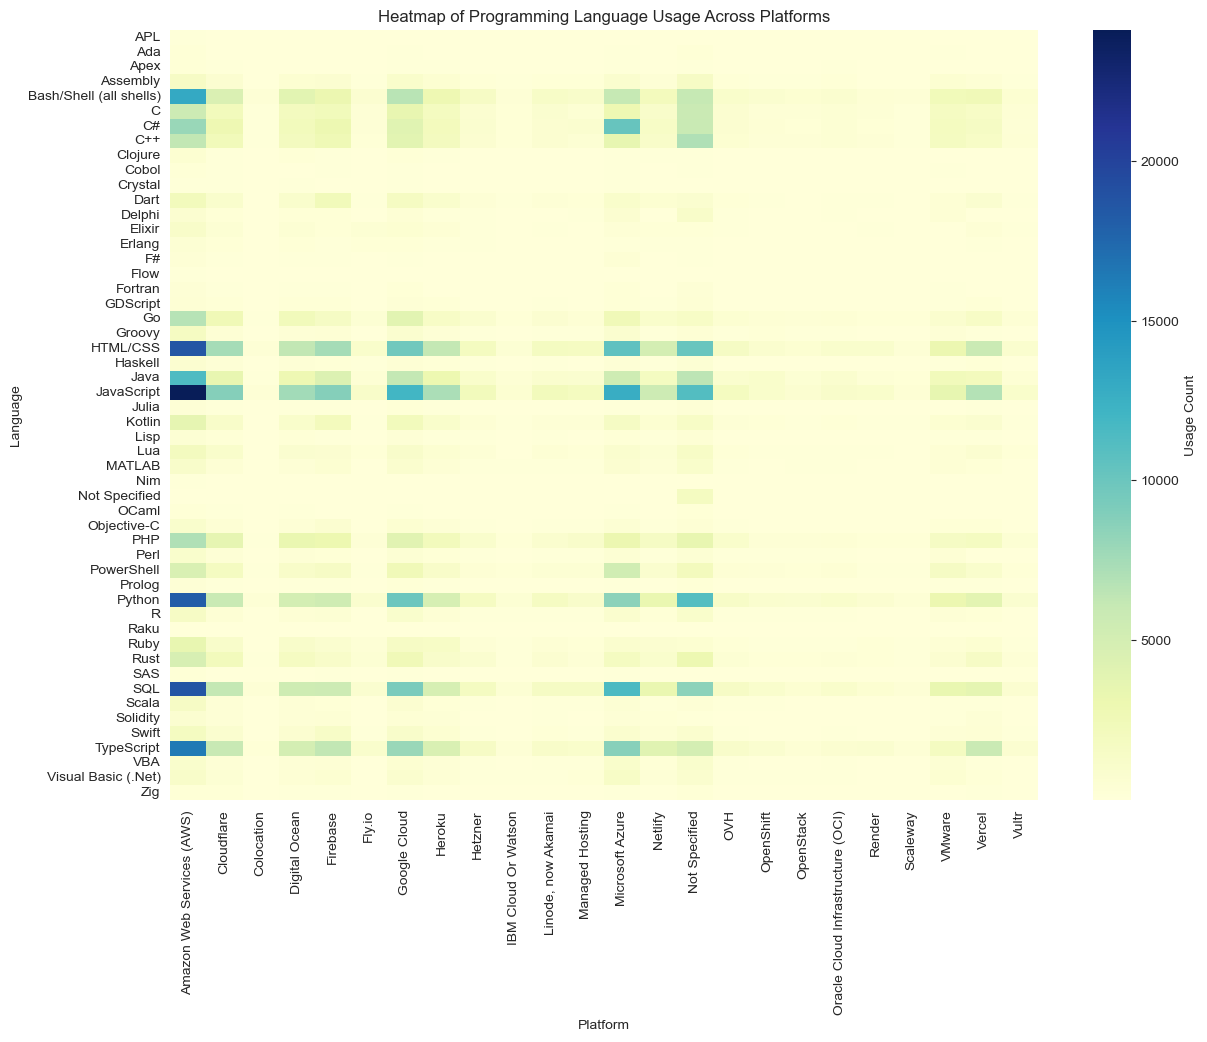

In [58]:
platforms_split = filtered_df['PlatformHaveWorkedWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
platforms_split.name = 'Platform'
languages_split = filtered_df['LanguageHaveWorkedWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
languages_split.name = 'Language'
df_expanded = filtered_df[['PlatformHaveWorkedWith', 'LanguageHaveWorkedWith']].join(platforms_split).join(languages_split)
heatmap_data = df_expanded.groupby(['Language', 'Platform']).size().unstack(fill_value=0)
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False, fmt="d", cbar_kws={'label': 'Usage Count'})
plt.title("Heatmap of Programming Language Usage Across Platforms")
plt.xlabel("Platform")
plt.ylabel("Language")
plt.show()

Overall Observations

JavaScript and Python Dominance: JavaScript and Python are the most widely used languages across various platforms, indicating their versatility and popularity in web development, data science, and machine learning.

Platform Preferences: Certain platforms have preferences for specific languages.

 For example, AWS and Google Cloud are popular with Python developers, while Microsoft Azure is often used with C#.

Language-Platform Combinations: The heatmap highlights specific language-platform combinations, such as Python with AWS and JavaScript with Vercel.

Less Popular Languages: Some languages, like Ada, Cobol, and Fortran, have limited usage across platforms, reflecting their niche applications.

Specific Insights by Language

JavaScript: JavaScript is widely used across various platforms, particularly for web development and front-end frameworks like React and Angular.

Python: Python is popular for data science, machine learning, and back-end development, with strong usage on platforms like AWS and Google Cloud.

C#: C# is commonly used with Microsoft Azure and is popular for enterprise development and game development.

Java: Java is widely used for enterprise applications and is often associated with platforms like AWS and Microsoft Azure.

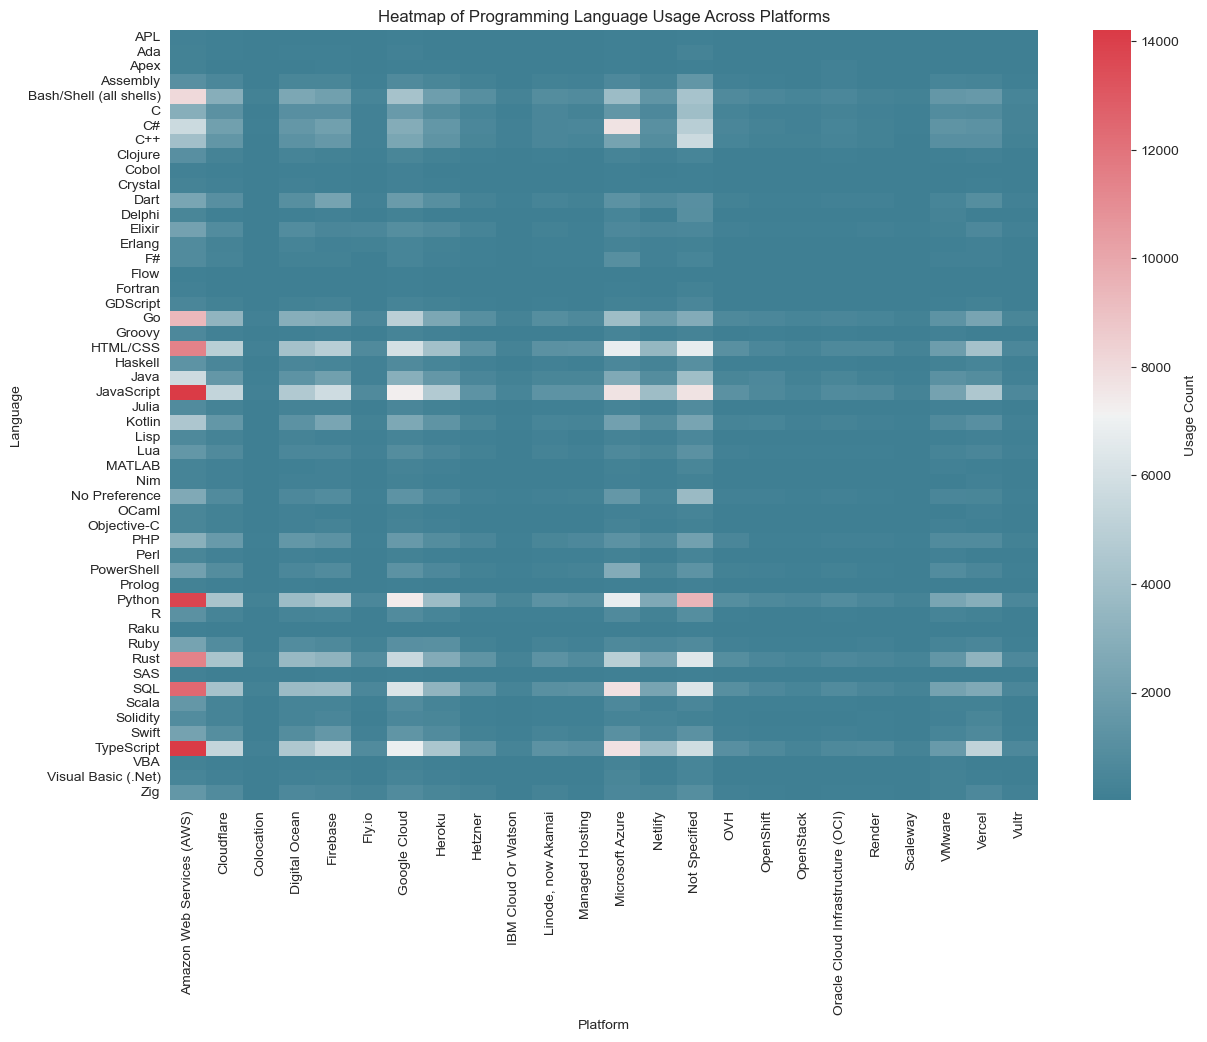

In [59]:
platforms_split = filtered_df['PlatformHaveWorkedWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
platforms_split.name = 'Platform'
languages_want_split = filtered_df['LanguageWantToWorkWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
languages_want_split.name = 'Language'
df_expanded = filtered_df[['PlatformHaveWorkedWith', 'LanguageWantToWorkWith']].join(platforms_split).join(languages_want_split)
heatmap_data = df_expanded.groupby(['Language', 'Platform']).size().unstack(fill_value=0)
plt.figure(figsize=(14, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(heatmap_data, cmap=cmap, annot=False, fmt="d", cbar_kws={'label': 'Usage Count'})
plt.title("Heatmap of Programming Language Usage Across Platforms")
plt.xlabel("Platform")
plt.ylabel("Language")
plt.show()

Overall Observations

JavaScript and Python Dominance: JavaScript and Python are the most widely used languages across various platforms, indicating their versatility and popularity in web development, data science, and machine learning.

Platform Preferences: Certain platforms have preferences for specific languages.

For example, AWS and Google Cloud are popular with Python developers, while Microsoft Azure is often used with C#.

Language-Platform Combinations: The heatmap highlights specific language-platform combinations, such as Python with AWS and JavaScript with Vercel.

Less Popular Languages: Some languages, like Ada, Cobol, and Fortran, have limited usage across platforms, reflecting their niche applications.

Specific Insights by Language

JavaScript: JavaScript is widely used across various platforms, particularly for web development and front-end frameworks like React and Angular.

Python: Python is popular for data science, machine learning, and back-end development, with strong usage on platforms like AWS and Google Cloud.

C#: C# is commonly used with Microsoft Azure and is popular for enterprise development and game development.

Java: Java is widely used for enterprise applications and is often associated with platforms like AWS and Microsoft Azure.

Other Languages: Other languages like Ruby, Go, and Rust have specific niches and are used on various platforms depending on their strengths and weaknesses.

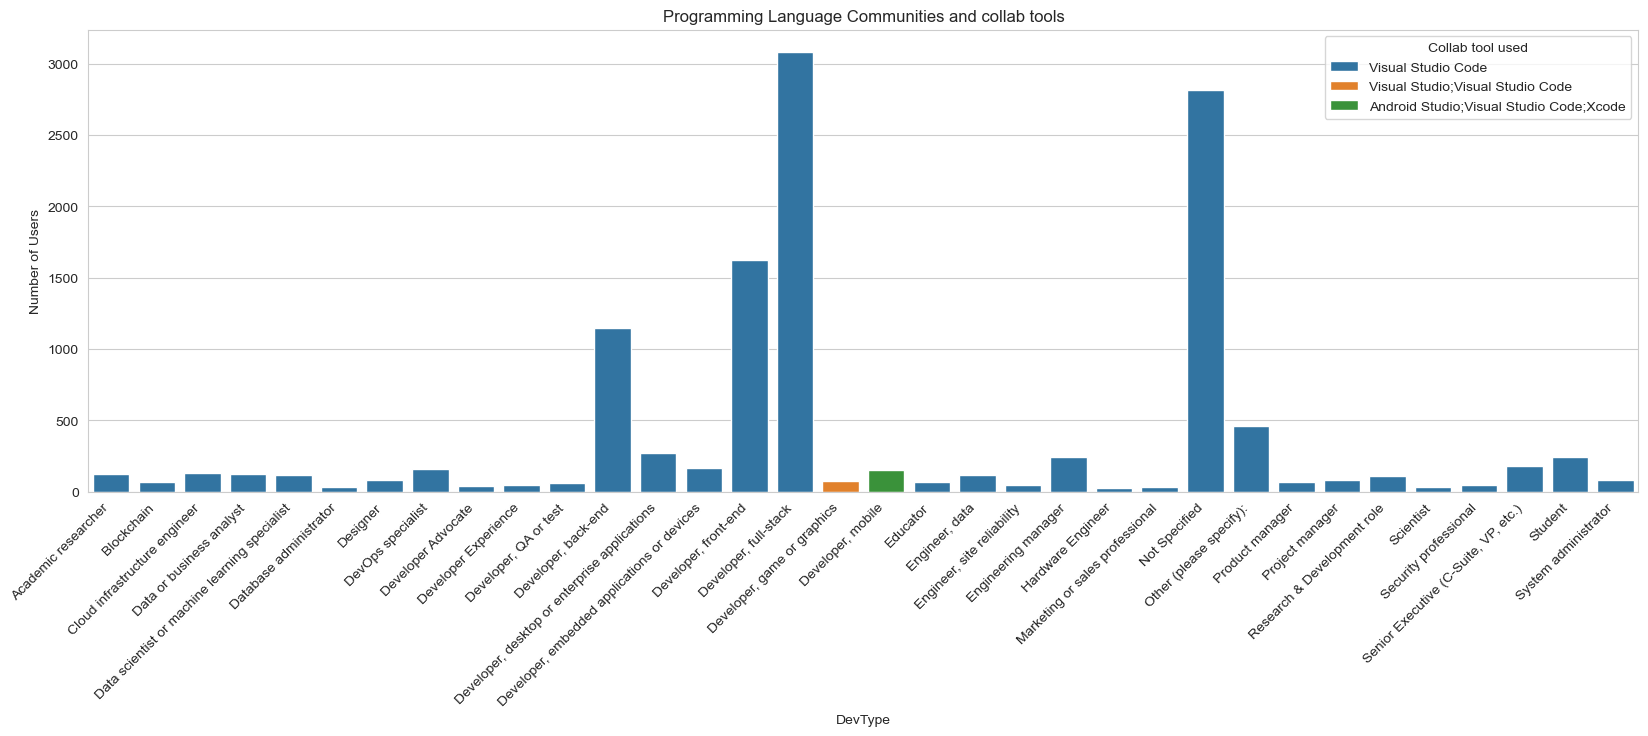

In [62]:
Colab_Tools = df.groupby(['DevType', 'NEWCollabToolsHaveWorkedWith']).size().reset_index(name='count')

filtered_Colab_Tools_counts = Colab_Tools.loc[Colab_Tools.groupby('DevType')['count'].idxmax()]


plt.figure(figsize=(20, 6))

sns.barplot(x='DevType', y='count', hue='NEWCollabToolsHaveWorkedWith', data=filtered_Colab_Tools_counts)

plt.title('Programming Language Communities and collab tools')

plt.xlabel('DevType')

plt.ylabel('Number of Users')

plt.xticks(rotation=45, ha='right')

plt.legend(title='Collab tool used')

plt.show()


Visual Studio Code is the most popular tool: It's used across a wide range of developer types, indicating its versatility and popularity.

Android Studio is used primarily by mobile developers: As expected, Android Studio is predominantly used by developers working on mobile applications.

Xcode is used by a smaller group of developers: This suggests that Xcode is primarily used for iOS and macOS development.

In [63]:
df1 = df

In [64]:
df1['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].str.split(';').str[0]

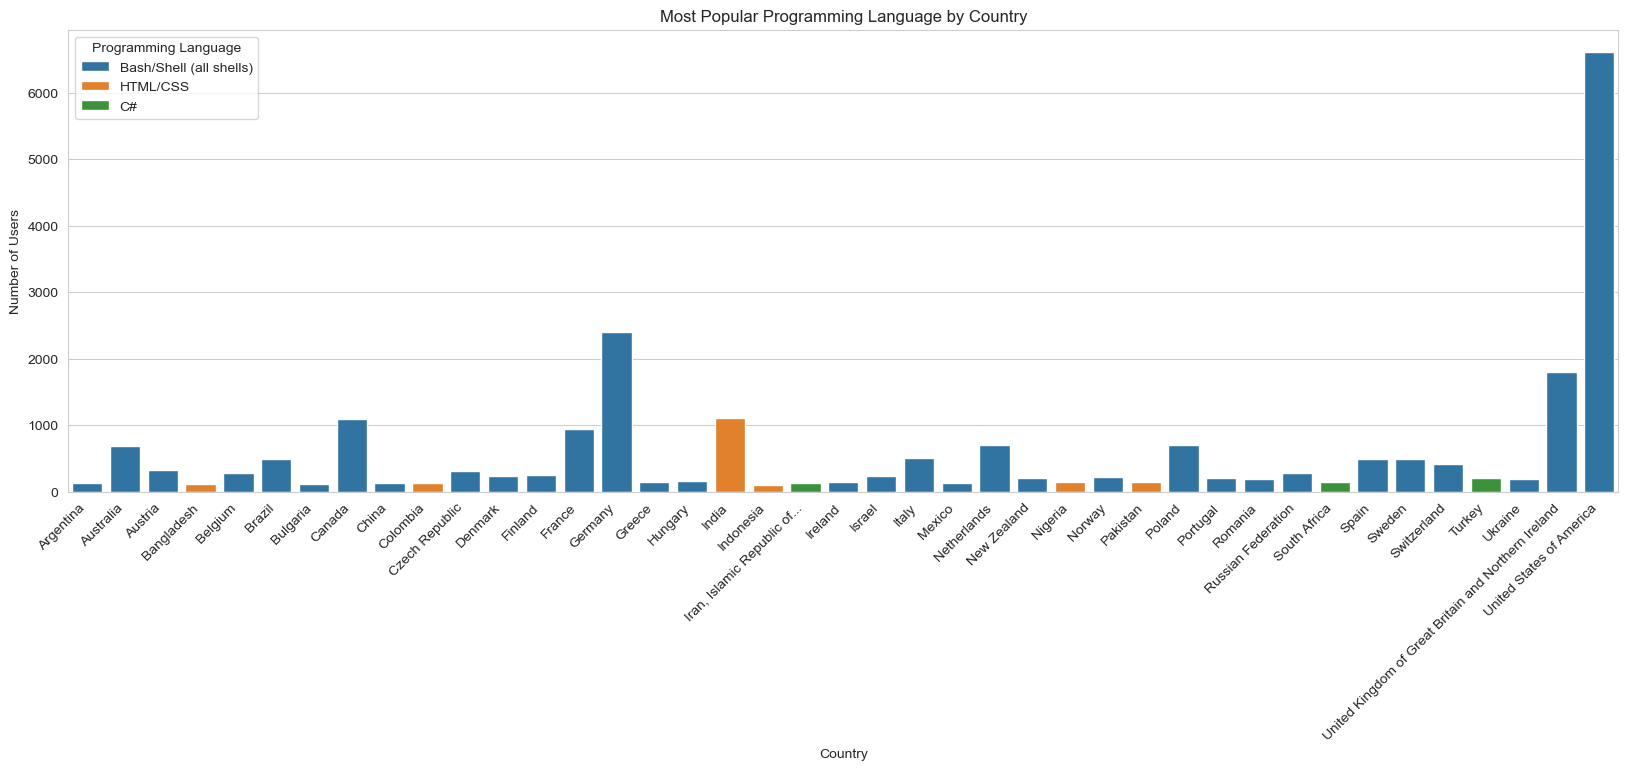

In [65]:
language_counts = df1.groupby(['Country', 'LanguageHaveWorkedWith']).size().reset_index(name='count')
most_used_language = language_counts.loc[language_counts.groupby('Country')['count'].idxmax()]
filtered_most_used_Language = most_used_language[most_used_language['count'] > 100]
plt.figure(figsize=(20, 6))
sns.barplot(x='Country', y='count', hue='LanguageHaveWorkedWith', data=filtered_most_used_Language)
plt.title('Most Popular Programming Language by Country')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Programming Language')
plt.show()

Wide Variation: There is a significant variation in the popularity of programming languages across different countries.

HTML/CSS and Bash/Shell: These two languages are consistently popular across many countries, likely due to their wide applicability in web development and system administration.

C++: C++ is also popular in several countries, indicating its use in system programming and performance-critical applications.

In [67]:
frameworks_data = df['AISearchHaveWorkedWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
frameworks_data.name = 'Framework'
df_expanded = df[['Country']].join(frameworks_data)
framework_counts = df_expanded.groupby(['Country', 'Framework']).size().reset_index(name='Count')
fig = px.bar(
    framework_counts,
    x='Country',
    y='Count',
    color='Framework',
    title='AI Frameworks Usage by Country',
    labels={'Count': 'Usage Count', 'Country': 'Country', 'Framework': 'AI Framework'},
    color_discrete_sequence=px.colors.qualitative.Plotly
)
fig.update_layout(
    xaxis_title="Country",
    yaxis_title="Usage Count",
    legend_title="AI Framework",
    barmode='stack',  #
    xaxis={'categoryorder':'total descending'}
)
fig.update_yaxes(range=[0, 2000])
fig.show()

Wide Range of Usage: The plot shows a wide range of usage for various AI frameworks across different countries.

ChatGPT Dominance: ChatGPT is the most popular AI framework, with high usage in many countries.

Regional Variations: There are regional variations in framework usage, with some frameworks being more popular in certain regions.

Specific Insights

ChatGPT: ChatGPT is the most widely used framework, with high usage in countries like the United States, Canada, and Australia.

Google Bard AI: Google Bard AI has significant usage in countries like the United States and Canada.

Most Used Databases with Specific Languages

# Lets Have a look at the top recommended language!!

In [ ]:
# Original data processing steps
processed_df = df[['DevType', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith']].copy()
expanded_rows = []

# Expand rows for DevType, LanguageHaveWorkedWith, and LanguageWantToWorkWith
for idx, row in processed_df.iterrows():
    dev_types = row['DevType'].split(';')
    languages_have = row['LanguageHaveWorkedWith'].split(';')
    languages_want = row['LanguageWantToWorkWith'].split(';')

    for dev_type in dev_types:
        for lang_have in languages_have:
            expanded_rows.append({
                'DevType': dev_type.strip(),
                'Language': lang_have.strip(),
                'HaveWorkedWith': 1,
                'WantToWorkWith': 0
            })
        for lang_want in languages_want:
            # Check if language is already added
            row_exists = False
            for row in expanded_rows:
                if row['DevType'] == dev_type.strip() and row['Language'] == lang_want.strip():
                    row['WantToWorkWith'] = 1
                    row_exists = True
                    break
            if not row_exists:
                expanded_rows.append({
                    'DevType': dev_type.strip(),
                    'Language': lang_want.strip(),
                    'HaveWorkedWith': 0,
                    'WantToWorkWith': 1
                })

# Create a DataFrame from the expanded rows
combined_df = pd.DataFrame(expanded_rows)

# Step 3: Calculate language popularity
popularity = combined_df.groupby('Language').sum()[['HaveWorkedWith', 'WantToWorkWith']]
popularity['TotalPopularity'] = popularity['HaveWorkedWith'] + popularity['WantToWorkWith'] * 2  # Adjust weights if needed
popular_languages = popularity['TotalPopularity'].sort_values(ascending=False)

# Step 4: Assign weights based on popularity
combined_df = pd.merge(combined_df, popularity[['TotalPopularity']], on='Language', how='left')
combined_df['Weight'] = combined_df['HaveWorkedWith'] + 2 * combined_df['WantToWorkWith'] + 0.5 * combined_df['TotalPopularity']

# Create the interaction matrix
developer_language_matrix = combined_df.pivot_table(index='DevType', columns='Language', values='Weight', fill_value=0)

# Step 5: Apply SVD with optimal component tuning
svd = TruncatedSVD(n_components=15)
latent_matrix = svd.fit_transform(developer_language_matrix)
latent_languages = svd.components_.T

# Step 6: Cosine similarity in the latent space
similarity_matrix = cosine_similarity(latent_matrix, latent_languages)

# Generate recommendations for a given developer type
dev_type_idx = 0 
recommendations = pd.Series(similarity_matrix[dev_type_idx], index=developer_language_matrix.columns).sort_values(ascending=False)

# Display recommendations with a focus on popular languages
print("Top Recommended Languages based on Popularity:", recommendations.head(10))
print("\nLanguage Popularity Scores (for reference):", popular_languages.head(10))
# Create a dictionary for the word cloud (language: score)
lang_recommendations = dict(zip(recommendations.index, recommendations.values))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(lang_recommendations)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Top Recommended Languages Word Cloud")
plt.show()


Top Recommended Languages:

C#, C, and HTML/CSS rank as the top recommended languages, aligning with both developer experience and aspirations. "No Preference" and "Not Specified" suggest some developers have flexibility in language choice.
Most Popular Languages by Total Popularity:

Bash/Shell leads in popularity, essential for system admin and DevOps. C#, HTML/CSS, C, and Assembly remain widely used across industries, while JavaScript’s high ranking highlights its demand in web development.
Emerging vs. Legacy Languages:

Python ranks lower in recommendations, indicating it may still be niche outside data roles. Go is popular in specific areas like backend but less universal.
Popularity-Driven Recommendations:

Weighting based on experience and aspirations emphasizes versatile languages like C#, C, and HTML/CSS, which are adaptable across roles.
Word Cloud Visualization:

The word cloud highlights top recommended languages, with larger words indicating higher scores, making it easy to spot popular choices at a glance.







# Conclusion

This analysis offers a detailed overview of programming language and framework preferences across demographics, roles, regions, and career stages:

Top Languages and Frameworks: JavaScript, Python, and SQL emerge as essential languages, with JavaScript dominating web development, Python seeing strong demand in data science and academia, and SQL remaining foundational in data handling. Frameworks like React, Angular, and Node.js lead in adoption, with React showing high current and future interest.

Experience and Career Stage Influence: Developers’ experience levels impact their language and framework choices. Beginners often use accessible languages like HTML/CSS and widely adopted frameworks like React. Experienced developers utilize specialized tools, like Shell for system automation and backend frameworks, reflecting a need for more advanced tools as their projects grow in complexity.

Emerging vs. Legacy Tools: New frameworks, like Svelte and Deno, are gaining interest, particularly among early-career developers, indicating a shift towards modern, efficient tools. Legacy tools like jQuery and WordPress show declining interest, pointing to a move toward more robust solutions that better meet today’s development needs.

Regional and Role-Based Trends: Geographic analysis reveals subtle variations, such as Node.js's popularity in the U.S. and India, indicating regional technology demands. Role-based insights show front-end developers favor frameworks like React and Vue, while back-end developers lean toward robust server-side options like Django and Spring. Mobile developers are more likely to choose cross-platform frameworks like React Native and Flutter.

Community and Learning Resources: Languages and tools with strong community backing, such as Python and React, see broad popularity across experience levels. This underscores the importance of resources, forums, and active communities in maintaining tool longevity and encouraging adoption.

Learning Methods: The data reveals a broad reliance on online resources, on-the-job training, and structured courses across experience levels. Newer developers often turn to bootcamps and online tutorials, while experienced developers utilize ongoing on-the-job training and open-source contributions for skill development.

Overall Impact
This analysis highlights evolving preferences in technology choices influenced by experience, role, and region. The insights offer valuable guidance for technology providers to tailor resources, for educators to shape relevant curricula, and for developers to plan skill growth strategically. These trends also point to future adoption patterns, emphasizing the importance of modern tools and the support of vibrant developer communities for sustained impact in the software development landscape.